## PROJECT PREDICTIVE MODELING

### Problem 1: Linear Regression


You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.

### Data Dictionary:

### Variable= Name	Description
* Carat	 =Carat weight of the cubic zirconia.
* Cut	 =Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.
* Color =	 Colour of the cubic zirconia.With D being the worst and J the best.
* Clarity=	Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best in terms of avg price) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
* Depth	= The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.
* Table	= The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.
* Price = the Price of the cubic zirconia.
* X	= Length of the cubic zirconia in mm.
* Y	= Width of the cubic zirconia in mm.
* Z	= Height of the cubic zirconia in mm.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
import warnings
warnings.filterwarnings("ignore")

### 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [2]:
df=pd.read_csv("cubic_zirconia.csv")

In [3]:
df.head()

Unnamed: 0  carat        cut color clarity  depth  table     x     y     z  \
0           1   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   
1           2   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   
2           3   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78   
3           4   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96   
4           5   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   

   price  
0    499  
1    984  
2   6289  
3   1082  
4    779

In [4]:
df.tail()

Unnamed: 0  carat        cut color clarity  depth  table     x     y  \
26962       26963   1.11    Premium     G     SI1   62.3   58.0  6.61  6.52   
26963       26964   0.33      Ideal     H      IF   61.9   55.0  4.44  4.42   
26964       26965   0.51    Premium     E     VS2   61.7   58.0  5.12  5.15   
26965       26966   0.27  Very Good     F    VVS2   61.8   56.0  4.19  4.20   
26966       26967   1.25    Premium     J     SI1   62.0   58.0  6.90  6.88   

          z  price  
26962  4.09   5408  
26963  2.74   1114  
26964  3.17   1656  
26965  2.60    682  
26966  4.27   5166

In [5]:
df.shape

(26967, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
df.isnull().sum()

Unnamed: 0      0
carat           0
cut             0
color           0
clarity         0
depth         697
table           0
x               0
y               0
z               0
price           0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [10]:
df.describe(include='all').T

count unique    top   freq         mean          std    min    25%  \
carat    26967.0    NaN    NaN    NaN     0.798375     0.477745    0.2    0.4   
cut        26967      5  Ideal  10816          NaN          NaN    NaN    NaN   
color      26967      7      G   5661          NaN          NaN    NaN    NaN   
clarity    26967      8    SI1   6571          NaN          NaN    NaN    NaN   
depth    26270.0    NaN    NaN    NaN    61.745147      1.41286   50.8   61.0   
table    26967.0    NaN    NaN    NaN     57.45608     2.232068   49.0   56.0   
x        26967.0    NaN    NaN    NaN     5.729854     1.128516    0.0   4.71   
y        26967.0    NaN    NaN    NaN     5.733569     1.166058    0.0   4.71   
z        26967.0    NaN    NaN    NaN     3.538057     0.720624    0.0    2.9   
price    26967.0    NaN    NaN    NaN  3939.518115  4024.864666  326.0  945.0   

            50%     75%      max  
carat       0.7    1.05      4.5  
cut         NaN     NaN      NaN  
color       NaN     NaN      NaN  
clarity     NaN     NaN      NaN  
depth      61.8    62.5     73.6  
table      57.0    59.0     79.0  
x          5.69    6.55    10.23  
y          5.71    6.54     58.9  
z          3.52    4.04     31.8  
price    2375.0  5360.0  18818.0

In [11]:
df.describe(include=[object]).T

count unique    top   freq
cut      26967      5  Ideal  10816
color    26967      7      G   5661
clarity  26967      8    SI1   6571

### Univariate Analysis
Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of  the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [12]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].skew(),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    sns.histplot(df[column], kde=True, color='c', ax=axs[0])
    sns.boxplot(x=df[column], ax=axs[1],color='r')
    

In [13]:
#carat

Description of carat
----------------------------------------------------------------------------
count    26967.000000
mean         0.798375
std          0.477745
min          0.200000
25%          0.400000
50%          0.700000
75%          1.050000
max          4.500000
Name: carat, dtype: float64

 Skewness of carat
----------------------------------------------------------------------------
1.1164807506784393

 Histogram and Boxplot of carat
----------------------------------------------------------------------------


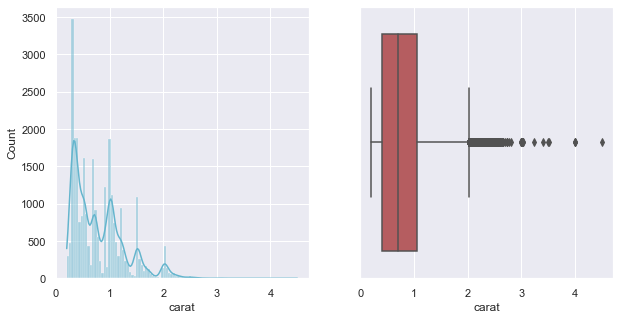

In [14]:
univariateAnalysis_numeric('carat',30)

Description of depth
----------------------------------------------------------------------------
count    26270.000000
mean        61.745147
std          1.412860
min         50.800000
25%         61.000000
50%         61.800000
75%         62.500000
max         73.600000
Name: depth, dtype: float64

 Skewness of depth
----------------------------------------------------------------------------
-0.028618055138992692

 Histogram and Boxplot of depth
----------------------------------------------------------------------------


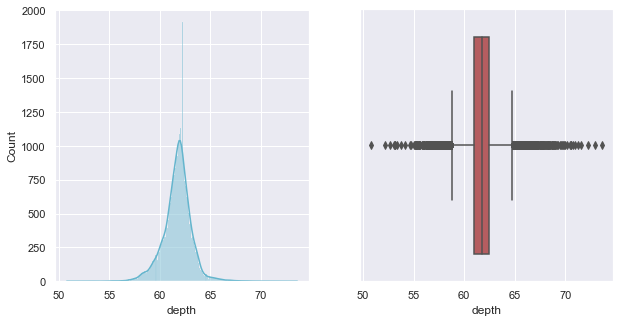

In [15]:
univariateAnalysis_numeric('depth',30)

Description of table
----------------------------------------------------------------------------
count    26967.000000
mean        57.456080
std          2.232068
min         49.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         79.000000
Name: table, dtype: float64

 Skewness of table
----------------------------------------------------------------------------
0.7657581949642266

 Histogram and Boxplot of table
----------------------------------------------------------------------------


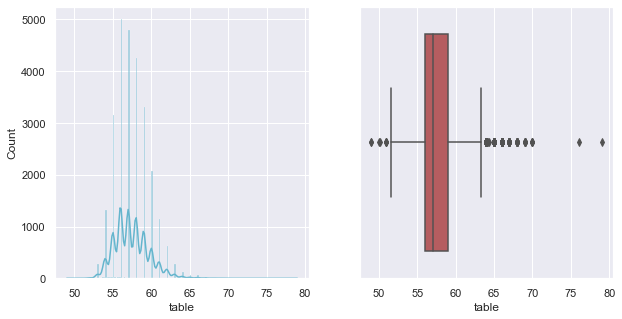

In [16]:
univariateAnalysis_numeric('table',100)

Description of x
----------------------------------------------------------------------------
count    26967.000000
mean         5.729854
std          1.128516
min          0.000000
25%          4.710000
50%          5.690000
75%          6.550000
max         10.230000
Name: x, dtype: float64

 Skewness of x
----------------------------------------------------------------------------
0.38798602540205324

 Histogram and Boxplot of x
----------------------------------------------------------------------------


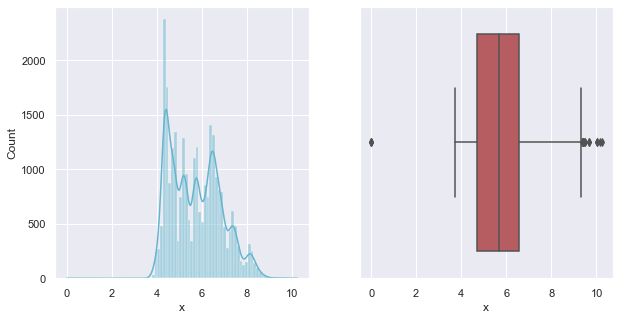

In [17]:
univariateAnalysis_numeric('x',100)

Description of y
----------------------------------------------------------------------------
count    26967.000000
mean         5.733569
std          1.166058
min          0.000000
25%          4.710000
50%          5.710000
75%          6.540000
max         58.900000
Name: y, dtype: float64

 Skewness of y
----------------------------------------------------------------------------
3.85018940739141

 Histogram and Boxplot of y
----------------------------------------------------------------------------


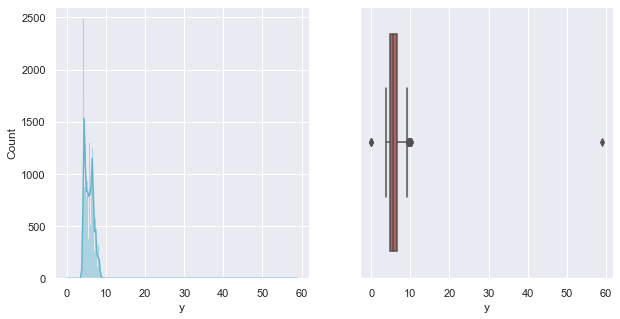

In [18]:
univariateAnalysis_numeric('y',100)

Description of z
----------------------------------------------------------------------------
count    26967.000000
mean         3.538057
std          0.720624
min          0.000000
25%          2.900000
50%          3.520000
75%          4.040000
max         31.800000
Name: z, dtype: float64

 Skewness of z
----------------------------------------------------------------------------
2.568256734005819

 Histogram and Boxplot of z
----------------------------------------------------------------------------


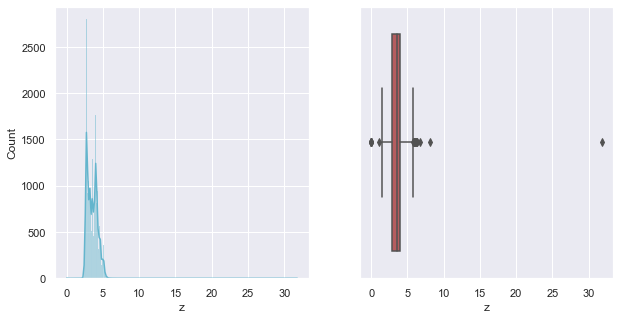

In [19]:
univariateAnalysis_numeric('z',100)

Description of price
----------------------------------------------------------------------------
count    26967.000000
mean      3939.518115
std       4024.864666
min        326.000000
25%        945.000000
50%       2375.000000
75%       5360.000000
max      18818.000000
Name: price, dtype: float64

 Skewness of price
----------------------------------------------------------------------------
1.6185499311727247

 Histogram and Boxplot of price
----------------------------------------------------------------------------


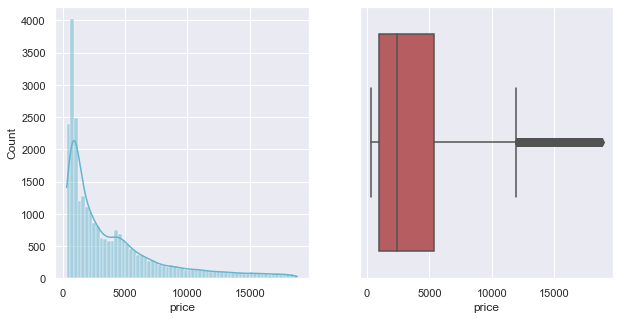

In [20]:
univariateAnalysis_numeric('price',100)

### color

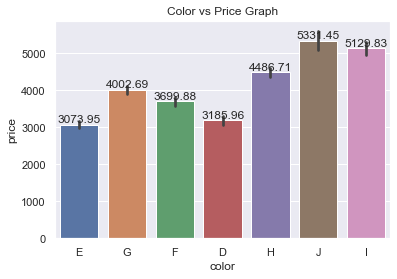

In [21]:
ax=sns.barplot(y='price',x='color',data=df)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('Color vs Price Graph')
plt.show()

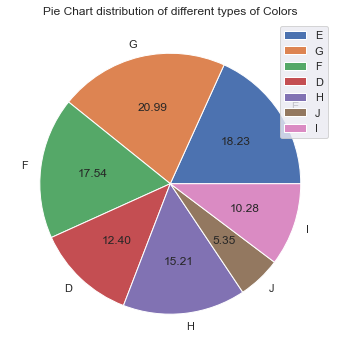

In [22]:
data=df['color'].value_counts(sort=False)
labels=df.color.unique()
plt.figure(figsize=(6,6))
plt.pie(x=data,labels=labels,autopct='%.2f')
plt.title('Pie Chart distribution of different types of Colors')
plt.legend()
plt.show();

### Clarity

In [23]:
df.groupby(by='clarity')['price'].mean().sort_values(ascending=True)

clarity
VVS1    2502.874388
IF      2734.222595
VVS2    3265.279336
VS1     3838.876130
I1      3906.547945
VS2     3968.759961
SI1     3998.155228
SI2     5095.000437
Name: price, dtype: float64

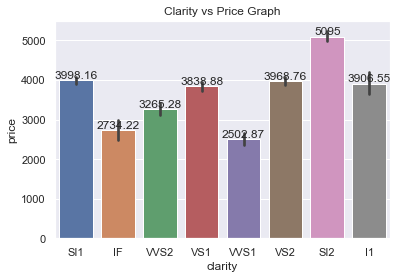

In [24]:
ax=sns.barplot(y='price',x='clarity',data=df)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('Clarity vs Price Graph')
plt.show()

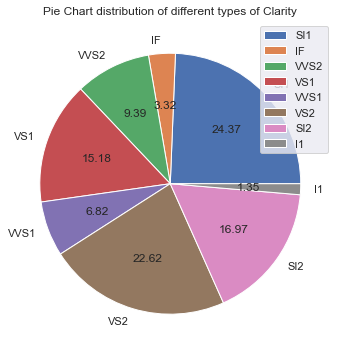

In [25]:
data=df['clarity'].value_counts(sort=False)
labels=df.clarity.unique()
plt.figure(figsize=(6,6))
plt.pie(x=data,labels=labels,autopct='%.2f')
plt.title('Pie Chart distribution of different types of Clarity')
plt.legend()
plt.show();

### Cut

In [26]:
df.groupby(by='cut')['price'].mean().sort_values(ascending=True)

cut
Ideal        3454.119730
Good         3930.581729
Very Good    4034.462852
Premium      4548.263806
Fair         4579.248399
Name: price, dtype: float64

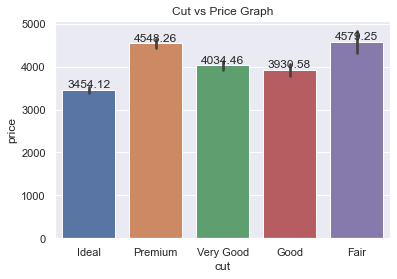

In [27]:
ax=sns.barplot(y='price',x='cut',data=df)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('Cut vs Price Graph')
plt.show()

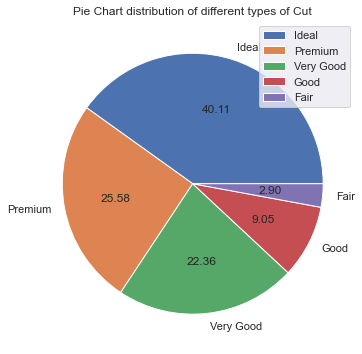

In [28]:
data=df['cut'].value_counts(sort=False)
labels=df.cut.unique()
plt.figure(figsize=(6,6))
plt.pie(x=data,labels=labels,autopct='%.2f')
plt.title('Pie Chart distribution of different types of Cut')
plt.legend()
plt.show();

### Checking pairwise distribution of the continuous variables

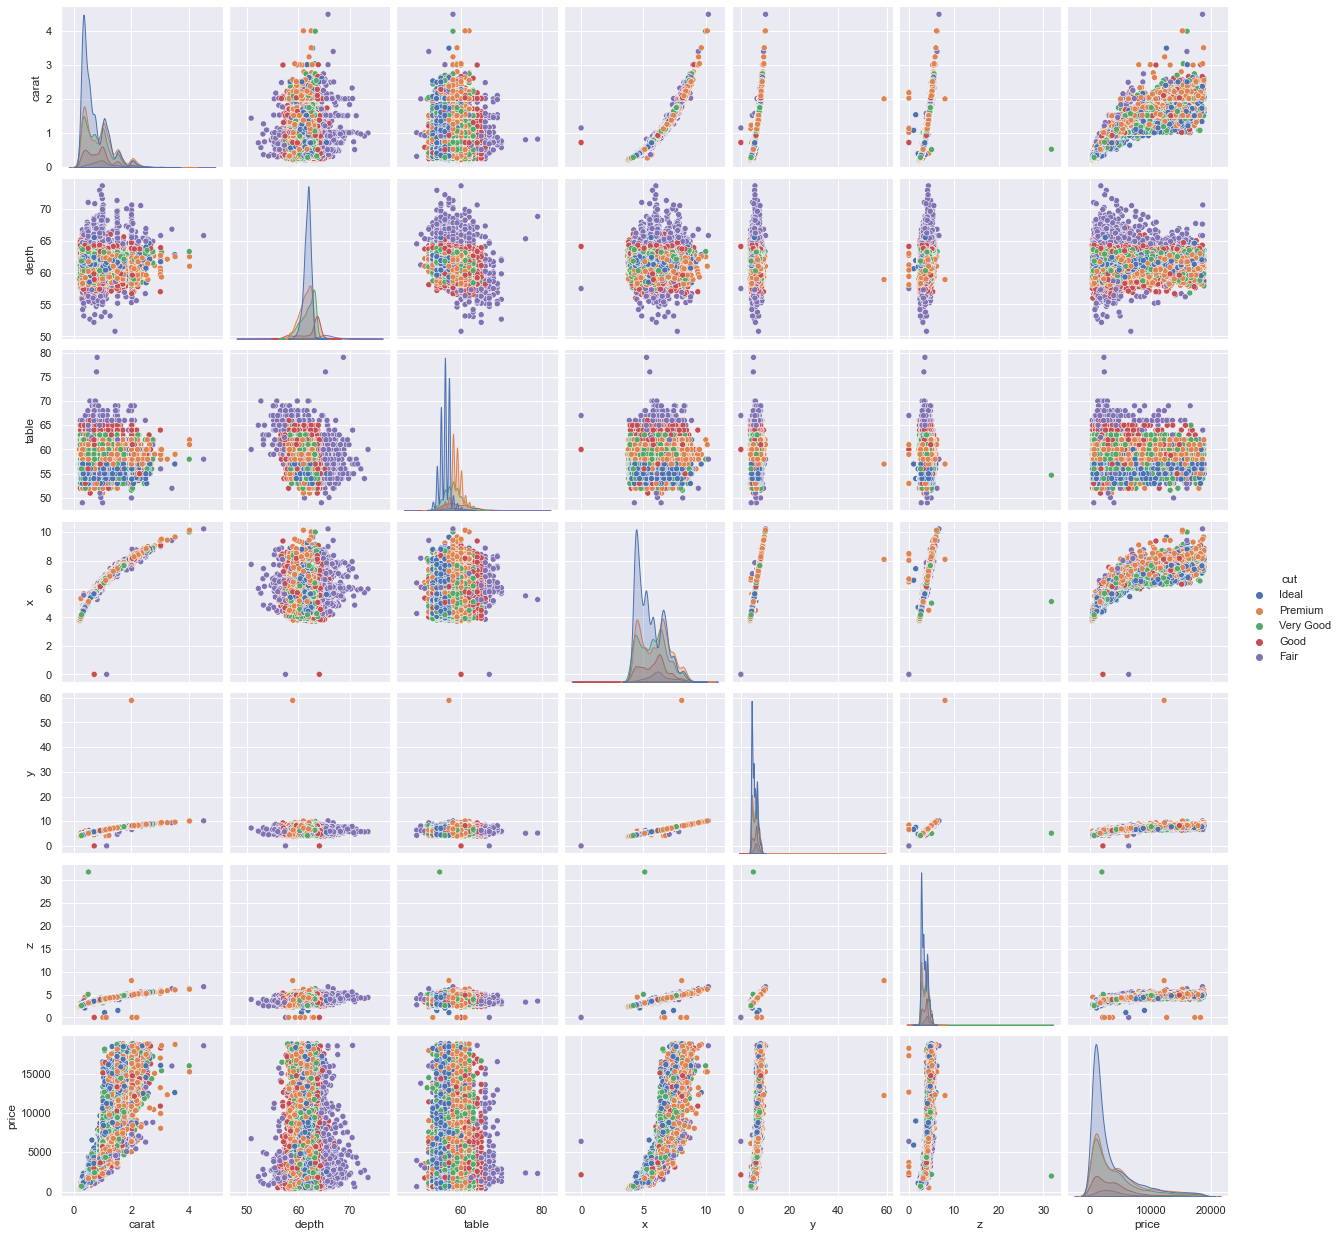

In [29]:
sns.pairplot(data=df,diag_kind='kde',hue='cut')
plt.grid()
plt.show()

In [30]:
corr=df.corr()

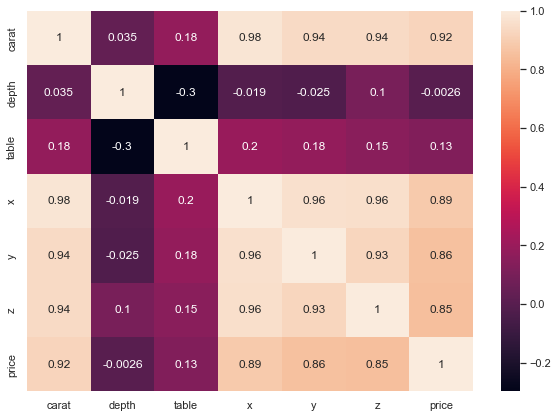

In [31]:
plt.figure(figsize=(10,7))
sns.heatmap(corr,annot=True,cbar=True)
plt.show()

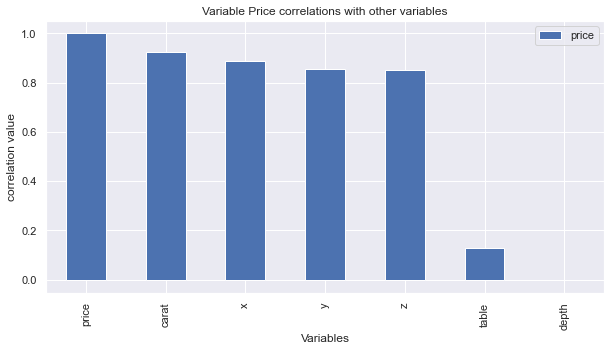

In [32]:
corr_mat = df.corr()
plt.figure(figsize = (10,5))
corr_mat['price'].sort_values(ascending = False).plot(kind = 'bar');
plt.legend()
plt.title('Variable Price correlations with other variables')
plt.ylabel('correlation value')
plt.xlabel('Variables')
plt.show()

In [33]:
#Identifying Positive (high) correlation with the Target variable
target_corr=abs(corr['price'])
positive_corr_target=target_corr[target_corr>0.5]
positive_corr_target

carat    0.922416
x        0.886247
y        0.856243
z        0.850536
price    1.000000
Name: price, dtype: float64

In [34]:
print(df[['x','y','z','carat']].corr())

              x         y         z     carat
x      1.000000  0.962715  0.956606  0.976368
y      0.962715  1.000000  0.928923  0.941071
z      0.956606  0.928923  1.000000  0.940640
carat  0.976368  0.941071  0.940640  1.000000


### Proportions of Outliers

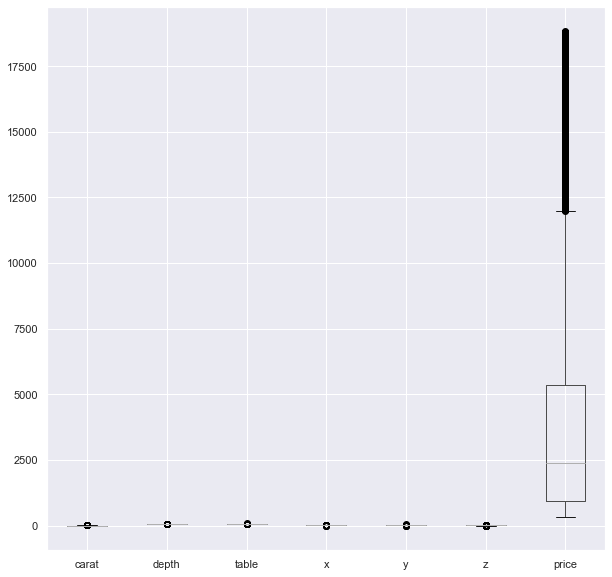

In [35]:
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()

In [36]:
num=df.select_dtypes(['int64','float64'])
num.describe()

carat         depth         table             x             y  \
count  26967.000000  26270.000000  26967.000000  26967.000000  26967.000000   
mean       0.798375     61.745147     57.456080      5.729854      5.733569   
std        0.477745      1.412860      2.232068      1.128516      1.166058   
min        0.200000     50.800000     49.000000      0.000000      0.000000   
25%        0.400000     61.000000     56.000000      4.710000      4.710000   
50%        0.700000     61.800000     57.000000      5.690000      5.710000   
75%        1.050000     62.500000     59.000000      6.550000      6.540000   
max        4.500000     73.600000     79.000000     10.230000     58.900000   

                  z         price  
count  26967.000000  26967.000000  
mean       3.538057   3939.518115  
std        0.720624   4024.864666  
min        0.000000    326.000000  
25%        2.900000    945.000000  
50%        3.520000   2375.000000  
75%        4.040000   5360.000000  
max       31.800000  18818.000000

In [37]:
cat=df.select_dtypes(['object'])
cat.describe()

cut  color clarity
count   26967  26967   26967
unique      5      7       8
top     Ideal      G     SI1
freq    10816   5661    6571

In [38]:
def detect_outliers(num):
    Q1,Q3=np.percentile(num,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [39]:
for i in num:
    lr,ur=detect_outliers(df[i])
    print('\n')
    print(i)
    print('-----------------')
    print('Lower Range',np.round(lr,decimals=2))
    print('Upper Range',np.round(ur,decimals=2))
    print('Proportion of outliers is',np.round(len(df[df[i]>ur])*100/len(df[i]),decimals=2))



carat
-----------------
Lower Range -0.58
Upper Range 2.03
Proportion of outliers is 2.45


depth
-----------------
Lower Range nan
Upper Range nan
Proportion of outliers is 0.0


table
-----------------
Lower Range 51.5
Upper Range 63.5
Proportion of outliers is 1.15


x
-----------------
Lower Range 1.95
Upper Range 9.31
Proportion of outliers is 0.04


y
-----------------
Lower Range 1.96
Upper Range 9.28
Proportion of outliers is 0.04


z
-----------------
Lower Range 1.19
Upper Range 5.75
Proportion of outliers is 0.05


price
-----------------
Lower Range -5677.5
Upper Range 11982.5
Proportion of outliers is 6.6


### 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [40]:
df.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [41]:
df[df.isnull().any(axis=1)]

carat        cut color clarity  depth  table     x     y     z  price
26      0.34      Ideal     D     SI1    NaN   57.0  4.50  4.44  2.74    803
86      0.74      Ideal     E     SI2    NaN   59.0  5.92  5.97  3.52   2501
117     1.00    Premium     F     SI1    NaN   59.0  6.40  6.36  4.00   5292
148     1.11    Premium     E     SI2    NaN   61.0  6.66  6.61  4.09   4177
163     1.00  Very Good     F     VS2    NaN   55.0  6.39  6.44  3.99   6340
...      ...        ...   ...     ...    ...    ...   ...   ...   ...    ...
26848   1.22  Very Good     H     VS1    NaN   59.0  6.91  6.85  4.29   7673
26854   1.29    Premium     I     VS2    NaN   58.0  7.12  7.03  4.27   6321
26879   0.51  Very Good     E     SI1    NaN   58.0  5.10  5.13  3.12   1343
26923   0.51      Ideal     D     VS2    NaN   57.0  5.12  5.09  3.18   1882
26960   1.10  Very Good     D     SI2    NaN   63.0  6.76  6.69  3.94   4361

[697 rows x 10 columns]

In [42]:
df[df.isin([0])].stack(0)

5821   x    0.0
       y    0.0
       z    0.0
6034   z    0.0
6215   x    0.0
       y    0.0
       z    0.0
10827  z    0.0
12498  z    0.0
12689  z    0.0
17506  x    0.0
       y    0.0
       z    0.0
18194  z    0.0
23758  z    0.0
dtype: object

In [43]:
df.loc[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))]

carat      cut color clarity  depth  table     x     y    z  price
5821    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
6034    2.02  Premium     H     VS2   62.7   53.0  8.02  7.95  0.0  18207
6215    0.71     Good     F     SI2   64.1   60.0  0.00  0.00  0.0   2130
10827   2.20  Premium     H     SI1   61.2   59.0  8.42  8.37  0.0  17265
12498   2.18  Premium     H     SI2   59.4   61.0  8.49  8.45  0.0  12631
12689   1.10  Premium     G     SI2   63.0   59.0  6.50  6.47  0.0   3696
17506   1.14     Fair     G     VS1   57.5   67.0  0.00  0.00  0.0   6381
18194   1.01  Premium     H      I1   58.1   59.0  6.66  6.60  0.0   3167
23758   1.12  Premium     G      I1   60.4   59.0  6.71  6.67  0.0   2383

In [44]:
df.drop(df[((df['x'] == 0) | (df['y'] == 0) | (df['z'] == 0))].index, inplace=True)

In [45]:
df.shape

(26958, 10)

<AxesSubplot:xlabel='depth'>

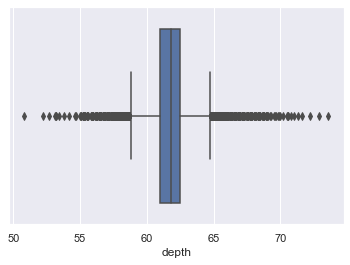

In [46]:
sns.boxplot(data=df,x='depth')

* Since,the attribute has too many outliers we will use Median to impute the missing values.

In [47]:
for column in df.columns:
    if df[column].dtype != 'object':
        median = df[column].median()
        df[column] = df[column].fillna(median)

In [48]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [49]:
### Null values in feature depth has been imputed with median values.

In [50]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z',
       'price'],
      dtype='object')

### Treating outliers

In [51]:
for feature in df[['carat', 'depth', 'table', 'x', 'y', 'z', 'price']]: 
    lr,ur=detect_outliers(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

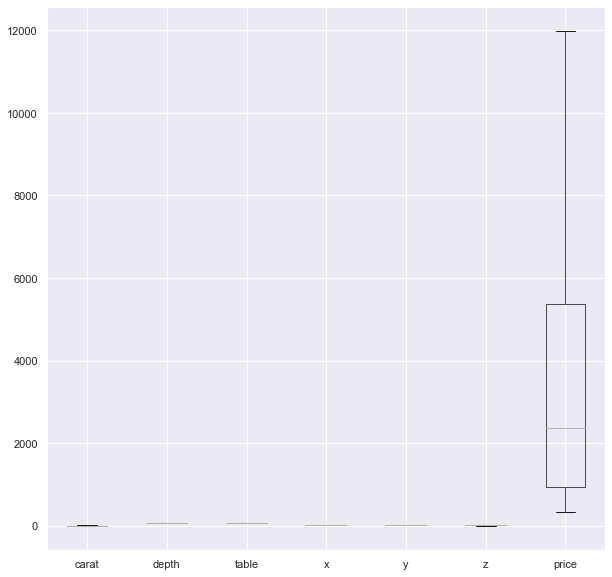

In [52]:
plt.figure(figsize=(10,10))
df.boxplot()
plt.show()

### Combining the sub levels of a ordinal variables

In [53]:
df.head()

carat        cut color clarity  depth  table     x     y     z   price
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   499.0
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   984.0
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78  6289.0
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96  1082.0
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   779.0

In [54]:
df_alt=df.copy()

In [55]:
df.clarity.unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

* Clarity= Clarity refers to the absence of the Inclusions and Blemishes. 
* In order from Worst to Best in terms of avg price attribute Clarity is ordered as follows IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1
* We have been provided with the best and worst types of clarity,we have combined the remaining types of clarity with them,into 3 types 'Worst','Better' and 'Best' as per the data dictionary information provided to us.

In [56]:
## We are grouping certain types of 'Clarity' under different categories 

df['clarity']=np.where(df['clarity'] =='IF', 'Worst', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS1', 'Worst', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VVS2', 'Worst', df['clarity'])

df['clarity']=np.where(df['clarity'] =='VS1', 'Good', df['clarity'])
df['clarity']=np.where(df['clarity'] =='VS2', 'Good', df['clarity'])

df['clarity']=np.where(df['clarity'] =='SI1', 'Best', df['clarity'])
df['clarity']=np.where(df['clarity'] =='SI2', 'Best', df['clarity'])
df['clarity']=np.where(df['clarity'] =='I1', 'Best', df['clarity'])


In [57]:
df.color.unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

* Color = Colour of the cubic zirconia.
* With D being the worst and J the best.
* We have been provided with the best and worst types of colors,we have combined the remaining types of colors with them,into 3 types 'Worst','Better' and 'Best' as per the data dictionary information provided to us.

In [58]:
## We are grouping certain types of 'Colors' under different categories 

df['color']=np.where(df['color'] =='D', 'Worst', df['color'])

df['color']=np.where(df['color'] =='E', 'Better', df['color'])
df['color']=np.where(df['color'] =='F', 'Better', df['color'])
df['color']=np.where(df['color'] =='G', 'Better', df['color'])

df['color']=np.where(df['color'] =='H', 'Best', df['color'])
df['color']=np.where(df['color'] =='I', 'Best', df['color'])
df['color']=np.where(df['color'] =='J', 'Best', df['color'])


In [59]:
df.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

* Cut = Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.

In [60]:
## We are grouping certain types of 'cuts' under different categories 

df['cut']=np.where(df['cut'] =='Fair', 'Poor Grade', df['cut'])

df['cut']=np.where(df['cut'] =='Good', 'Medium Grade', df['cut'])
df['cut']=np.where(df['cut'] =='Very Good', 'Medium Grade', df['cut'])

df['cut']=np.where(df['cut'] =='Premium', 'Best Grade', df['cut'])
df['cut']=np.where(df['cut'] =='Ideal', 'Best Grade', df['cut'])

In [61]:
df.head()

carat           cut   color clarity  depth  table     x     y     z   price
0   0.30    Best Grade  Better    Best   62.1   58.0  4.27  4.29  2.66   499.0
1   0.33    Best Grade  Better   Worst   60.8   58.0  4.42  4.46  2.70   984.0
2   0.90  Medium Grade  Better   Worst   62.2   60.0  6.04  6.12  3.78  6289.0
3   0.42    Best Grade  Better    Good   61.6   56.0  4.82  4.80  2.96  1082.0
4   0.31    Best Grade  Better   Worst   60.4   59.0  4.35  4.43  2.65   779.0

In [62]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price      float64
dtype: object

### 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

* Features like Cut,color and Clarity are object type

In [63]:
df['cut']=df['cut'].replace({'Best Grade':2, 'Medium Grade':1, 'Poor Grade':0})
df['color']=df['color'].replace({'Better':1, 'Worst':0, 'Best':2})
df['clarity']=df['clarity'].replace({'Best':2, 'Worst':0, 'Good':1})

In [64]:
df.shape

(26958, 10)

In [65]:
df.head()

carat  cut  color  clarity  depth  table     x     y     z   price
0   0.30    2      1        2   62.1   58.0  4.27  4.29  2.66   499.0
1   0.33    2      1        0   60.8   58.0  4.42  4.46  2.70   984.0
2   0.90    1      1        0   62.2   60.0  6.04  6.12  3.78  6289.0
3   0.42    2      1        1   61.6   56.0  4.82  4.80  2.96  1082.0
4   0.31    2      1        0   60.4   59.0  4.35  4.43  2.65   779.0

### MODEL BUILDING

In [66]:
# separating the data into dependent and independent variable
X=df.drop('price',axis=1)
y=df[['price']]

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
# splitting the dataset into 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [69]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (18870, 9)
Number of rows and columns of the training set for the dependent variable: (18870, 1)
Number of rows and columns of the test set for the independent variables: (8088, 9)
Number of rows and columns of the test set for the dependent variable: (8088, 1)


In [70]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [71]:
X_train=pd.DataFrame(X_train,columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
X_train.head(5)

carat       cut     color   clarity     depth     table         x  \
0 -0.176264 -1.158620 -0.297261 -0.304761  1.269677  0.735568 -0.182658   
1 -1.068082 -1.158620 -0.297261 -0.304761  0.940165  0.269820 -1.297156   
2 -0.198016 -1.158620  1.287739 -0.304761  1.763944  0.735568 -0.075666   
3 -0.937572  0.696548 -0.297261 -0.304761 -1.284039 -0.661675 -0.958349   
4  1.890142 -1.158620  1.287739  1.021233  1.022543 -0.195927  1.538127   

          y         z  
0 -0.105231 -0.022493  
1 -1.272566 -1.204877  
2 -0.114210  0.078442  
3 -0.994201 -1.075103  
4  1.591895  1.693406

In [72]:
X_test.shape

(8088, 9)

In [73]:
X_test=pd.DataFrame(X_test,columns=['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z'])
X_test.head(5)

carat       cut     color   clarity     depth     table         x  \
0  0.476285 -1.158620  1.287739  1.021233  0.116386 -0.195927  0.566285   
1  0.041252  0.696548 -0.297261 -0.304761  0.034008 -1.127423  0.218561   
2 -0.828814 -1.158620  1.287739 -1.630755  0.198764 -0.661675 -0.851357   
3  0.063004  0.696548 -0.297261  1.021233  0.445897 -0.661675  0.209645   
4  0.737305  0.696548 -0.297261 -0.304761  0.775409 -0.195927  0.824848   

          y         z  
0  0.613130  0.597537  
1  0.271908  0.251474  
2 -0.823591 -0.815556  
3  0.262929  0.280312  
4  0.855576  0.929182

df['price']=df['price'].astype('float64')

In [74]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [75]:
regression_model.coef_

array([[ 4082.82977492,   118.64734648,  -393.22623988,  -623.84007804,
           41.57518738,   -60.93270416, -1678.84310618,  1998.44976662,
         -846.28445734]])

In [76]:
regression_model.intercept_

array([3723.90688924])

In [77]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 4082.8297749209373
The coefficient for cut is 118.64734647911044
The coefficient for color is -393.2262398775166
The coefficient for clarity is -623.8400780380213
The coefficient for depth is 41.57518737898954
The coefficient for table is -60.93270415715026
The coefficient for x is -1678.843106180933
The coefficient for y is 1998.4497666239158
The coefficient for z is -846.2844573405876


In [78]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3723.9068892421833


In [79]:
# R square on training data
regression_model.score(X_train,y_train)

0.9241164954254978

In [80]:
# R square on testing data
regression_model.score(X_test, y_test)

0.9202295193379724

In [81]:
from sklearn import metrics

In [82]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

951.7810888696142

In [83]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

989.2287915258019

In [84]:
# Model prediction on test data
pred = regression_model.predict(X_test)

In [85]:
# Model Evaluation
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test, pred))
print("MSE:",metrics.mean_squared_error(y_test, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

R^2: 0.9202295193379724
Adjusted R^2: 0.9201406440809832
MAE: 692.9217875361164
MSE: 978573.6019835984
RMSE: 989.2287915258019


In [86]:
# Model prediction on test data 
pred = regression_model.predict(X_test)
print("R^2:",metrics.r2_score(y_test, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

R^2: 0.9202295193379724
Adjusted R^2: 0.9201406440809832


In [87]:
adj_r2=1-(1- 0.9202295193379724)*(8088-1)/(8088-9-1)
adj_r2

0.9201406440809832

In [88]:
# For each X, calculate VIF and save in dataframe
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

VIF Factor features
0       122.5    carat
1        11.9      cut
2         4.9    color
3         4.3  clarity
4      1092.3    depth
5       776.7    table
6     11025.9        x
7      9376.8        y
8      3176.1        z

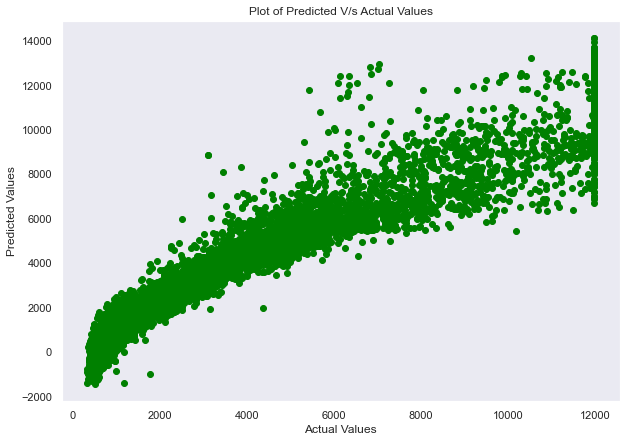

In [89]:
lrm_predict=regression_model.predict(X_test)
plt.figure(figsize=(10,7))
plt.scatter(y_test,lrm_predict,c='green')
plt.title('Plot of Predicted V/s Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid()
plt.show()

### Linear Regression using statsmodels

In [90]:
df_alt.head()

carat        cut color clarity  depth  table     x     y     z   price
0   0.30      Ideal     E     SI1   62.1   58.0  4.27  4.29  2.66   499.0
1   0.33    Premium     G      IF   60.8   58.0  4.42  4.46  2.70   984.0
2   0.90  Very Good     E    VVS2   62.2   60.0  6.04  6.12  3.78  6289.0
3   0.42      Ideal     F     VS1   61.6   56.0  4.82  4.80  2.96  1082.0
4   0.31      Ideal     F    VVS1   60.4   59.0  4.35  4.43  2.65   779.0

In [91]:
data = pd.get_dummies(df_alt, columns=['cut','color','clarity'],drop_first=True)
data.head(5)

carat  depth  table     x     y     z   price  cut_Good  cut_Ideal  \
0   0.30   62.1   58.0  4.27  4.29  2.66   499.0         0          1   
1   0.33   60.8   58.0  4.42  4.46  2.70   984.0         0          0   
2   0.90   62.2   60.0  6.04  6.12  3.78  6289.0         0          0   
3   0.42   61.6   56.0  4.82  4.80  2.96  1082.0         0          1   
4   0.31   60.4   59.0  4.35  4.43  2.65   779.0         0          1   

   cut_Premium  ...  color_H  color_I  color_J  clarity_IF  clarity_SI1  \
0            0  ...        0        0        0           0            1   
1            1  ...        0        0        0           1            0   
2            0  ...        0        0        0           0            0   
3            0  ...        0        0        0           0            0   
4            0  ...        0        0        0           0            0   

   clarity_SI2  clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            0            0            0             0             0  
1            0            0            0             0             0  
2            0            0            0             0             1  
3            0            1            0             0             0  
4            0            0            0             1             0  

[5 rows x 24 columns]

In [92]:
from scipy.stats import zscore
data=data.apply(zscore)
data.head()

carat     depth     table         x         y         z     price  \
0 -1.067306  0.286726  0.261941 -1.296438 -1.289580 -1.261448 -0.933219   
1 -1.002414 -0.780109  0.261941 -1.163237 -1.137532 -1.203982 -0.793428   
2  0.230546  0.368790  1.189304  0.275339  0.347170  0.347606  0.735631   
3 -0.807736 -0.123596 -0.665422 -0.808033 -0.833436 -0.830451 -0.765181   
4 -1.045675 -1.108366  0.725622 -1.225398 -1.164364 -1.275814 -0.852515   

   cut_Good  cut_Ideal  cut_Premium  ...   color_H   color_I   color_J  \
0 -0.315395   1.221646    -0.586117  ... -0.423397 -0.338476 -0.237813   
1 -0.315395  -0.818568     1.706143  ... -0.423397 -0.338476 -0.237813   
2 -0.315395  -0.818568    -0.586117  ... -0.423397 -0.338476 -0.237813   
3 -0.315395   1.221646    -0.586117  ... -0.423397 -0.338476 -0.237813   
4 -0.315395   1.221646    -0.586117  ... -0.423397 -0.338476 -0.237813   

   clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
0   -0.185203     1.761589    -0.451864    -0.423032    -0.540675   
1    5.399478    -0.567669    -0.451864    -0.423032    -0.540675   
2   -0.185203    -0.567669    -0.451864    -0.423032    -0.540675   
3   -0.185203    -0.567669    -0.451864     2.363890    -0.540675   
4   -0.185203    -0.567669    -0.451864    -0.423032    -0.540675   

   clarity_VVS1  clarity_VVS2  
0     -0.270576     -0.321893  
1     -0.270576     -0.321893  
2     -0.270576      3.106626  
3     -0.270576     -0.321893  
4      3.695816     -0.321893  

[5 rows x 24 columns]

In [93]:
X_ols = data.drop('price', axis=1)
y_ols= data[['price']]
#Train and test split of X and y in 70:30 ratio
X_train_ols, X_test_ols, y_train_ols, y_test_ols = train_test_split(X_ols, y_ols, test_size=0.3 ,
random_state=1)

In [94]:
# concatenate X and y into a single dataframe
data_train = pd.concat([X_train_ols, y_train_ols], axis=1)
data_test=pd.concat([X_test_ols,y_test_ols],axis=1)
data_train.head()

carat     depth     table         x         y         z  cut_Good  \
7598  -0.180440  1.271496  0.725622 -0.186426 -0.108973 -0.025924 -0.315395   
8882  -1.067306  0.943239  0.261941 -1.296438 -1.271692 -1.203982 -0.315395   
22763 -0.202071  1.763881  0.725622 -0.079865 -0.117917  0.074642  3.170629   
6643  -0.937521 -1.272495 -0.665422 -0.958995 -0.994428 -1.074683 -0.315395   
18701  1.874493  1.025303 -0.201740  1.527433  1.581441  1.683696 -0.315395   

       cut_Ideal  cut_Premium  cut_Very Good  ...   color_I   color_J  \
7598   -0.818568    -0.586117       1.862967  ... -0.338476 -0.237813   
8882   -0.818568    -0.586117       1.862967  ... -0.338476 -0.237813   
22763  -0.818568    -0.586117      -0.536778  ... -0.338476 -0.237813   
6643    1.221646    -0.586117      -0.536778  ... -0.338476 -0.237813   
18701  -0.818568    -0.586117       1.862967  ...  2.954423 -0.237813   

       clarity_IF  clarity_SI1  clarity_SI2  clarity_VS1  clarity_VS2  \
7598    -0.185203    -0.567669    -0.451864     2.363890    -0.540675   
8882    -0.185203    -0.567669    -0.451864    -0.423032     1.849539   
22763   -0.185203    -0.567669    -0.451864    -0.423032     1.849539   
6643    -0.185203    -0.567669    -0.451864    -0.423032     1.849539   
18701   -0.185203     1.761589    -0.451864    -0.423032    -0.540675   

       clarity_VVS1  clarity_VVS2     price  
7598      -0.270576     -0.321893 -0.279226  
8882      -0.270576     -0.321893 -0.920249  
22763     -0.270576     -0.321893 -0.399418  
6643      -0.270576     -0.321893 -0.765758  
18701     -0.270576     -0.321893  1.488488  

[5 rows x 24 columns]

In [95]:
data_train.columns

Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2', 'price'],
      dtype='object')

In [96]:
exp_price = ( 'price ~ carat + depth + table + x+ y + z + cut_Good +cut_Ideal + cut_Premium + color_E + color_F + color_G + color_H + color_I + color_J +clarity_IF + clarity_SI1 + clarity_SI2 + clarity_VS1 + clarity_VS2 + clarity_VVS1 +clarity_VVS2')

In [97]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= exp_price , data = data_train).fit()
lm1.params

Intercept       0.001591
carat           1.237663
depth           0.004732
table          -0.018915
x              -0.432961
y               0.449856
z              -0.191681
cut_Good       -0.005275
cut_Ideal       0.020449
cut_Premium     0.019641
color_E        -0.020958
color_F        -0.027982
color_G        -0.047658
color_H        -0.086541
color_I        -0.114144
color_J        -0.122475
clarity_IF      0.211262
clarity_SI1     0.327762
clarity_SI2     0.194750
clarity_VS1     0.356474
clarity_VS2     0.380862
clarity_VVS1    0.281065
clarity_VVS2    0.321454
dtype: float64

In [98]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                 1.379e+04
Date:                Sun, 22 May 2022   Prob (F-statistic):               0.00
Time:                        22:31:34   Log-Likelihood:                 84.885
No. Observations:               18870   AIC:                            -123.8
Df Residuals:                   18847   BIC:                             56.67
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0016      0.002      0.906   

In [99]:
# Calculate MSE
mse = np.mean((lm1.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
mse

0.058025430696769034

In [100]:
#Root Mean Squared Error - RMSE
np.sqrt(mse)

0.24088468340010544

In [101]:
np.sqrt(lm1.mse_resid) #another way

0.24103162080269697

In [102]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

In [103]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(0.0) * Intercept + (1.24) * carat + (0.0) * depth + (-0.02) * table + (-0.43) * x + (0.45) * y + (-0.19) * z + (-0.01) * cut_Good + (0.02) * cut_Ideal + (0.02) * cut_Premium + (-0.02) * color_E + (-0.03) * color_F + (-0.05) * color_G + (-0.09) * color_H + (-0.11) * color_I + (-0.12) * color_J + (0.21) * clarity_IF + (0.33) * clarity_SI1 + (0.19) * clarity_SI2 + (0.36) * clarity_VS1 + (0.38) * clarity_VS2 + (0.28) * clarity_VVS1 + (0.32) * clarity_VVS2 + 

### 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

The various steps involved in the project are as follows
1.	Loading and reading the data set, checking the data types and descriptive summary.
2.	Performing EDA through Univariate, bivariate and multivariate analysis, Outlier treatment and imputing the missing values studying about the various patterns and correlations (through Heatmap) present in the data with the useful insights from the EDA process and interpreting the same.
3.	Combining the ordinal levels of the categorical data according to the EDA insights and with the help of data dictionary.
4.	We encoded the categorical variables manually and separated the independent and Dependent variable, splitting them in 70:30 ratio then scaling them using a Standard Scalar.
5.	Building the Linear Regression Model and obtaining the model score(R-square) & RMSE for both training and testing data, Getting the coefficients and the intercepts for LR model, Calculating the Adjusted R-Square and then Plotting the Scatter plot for actual versus predicted values
6.	Calculation of VIF scores for the Linear Regression model and deriving inference from it.
7.	Then finally, Building a Linear Regression using stats models through concating the split data and applying smf.ols function, also we used one hot encoding here without merging or grouping, obtaining the params (coefficients) and OLS regression summary and interpreting the same.



Business Overview
In this business case study, we are expected to help the Gem Stones co ltd to predict the price for the cubic zirconia and determine the different price ranges. Below are the insights from the exploratory data analysis and linear regression model build from the dataset is given. 

Business Insights
•	Through EDA it was found that the Ideal cut, Premium cut, Very Good cut had given profit to the company and also Ideal cut alone accounts for 40% of the sales and is the most sold among the types of cut with the low average price making it customer go to type of cut.
•	Premium and Very Good amounts to almost close to 50% of the sales and have high average price bringing the company good amounts of profit.
•	The Cut type ‘Fair’ has least sale 2.90% but is most expensive amongst all with mean price of 4579.24, which is quite absurd for the business.
•	In terms of the colors, H, I, J turned out to be profit generating, as they are the most expensive colors of gemstones. ‘J’ is highly priced (mean) at 5331.45 followed by ‘I’ at 5129.83 and ‘H’ at 4486.71.
•	The most sold color is ‘G’ followed by ‘E’ and ‘F’ that are mean priced between 3000 to 4000 which accounts for more than 56% of the total types of color sold in gemstones
•	Similarly, the clarity levels VS1, VS2, SI1 were the most profitable among all. In addition, SI2 turned out to be the costliest in terms of price with an average price of 5095.
•	VS1, VS2, SI1 accounts for almost 1/3rd of all the sales and are most profitable.

 Business Recommendations: 
• For better revenue-generation from the product sales point of view the focus will have to be customer preference, market preference, highest selling items, and factors pressing customer demand. 
• In terms of Cut, the customer preference and sale goes with ideal, premium, and very good cuts. Hence, these highly selling products will be the prime focus in the marketing campaigns and new schemes and offers can be launched to boost the sales even more.
 • The marketing ads can be broadcasted by focusing on the providing services cut perfection & polishing of the gemstones, customer acceptance, quality, and pricing.
 • Talking about the best five attributes that are most important: Cut, Carat, Y (Width of the stone), clarity (VS1, VS2, SI1) and price.


### Problem 2: Logistic Regression and LDA


You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

### Data Dictionary:

### Variable Name	Description
* Holiday_Package =	 Opted for Holiday Package yes/no?
* Salary =	 Employee salary
* age =	 Age in years
* edu 	= Years of formal education
* no_young_children =	 The number of young children (younger than 7 years)
* no_older_children 	= Number of older children
* foreign =	 foreigner Yes/No

### 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [104]:
df2=pd.read_csv("Holiday_Package.csv")

In [105]:
df2.head()

Unnamed: 0 Holliday_Package  Salary  age  educ  no_young_children  \
0           1               no   48412   30     8                  1   
1           2              yes   37207   45     8                  0   
2           3               no   58022   46     9                  0   
3           4               no   66503   31    11                  2   
4           5               no   66734   44    12                  0   

   no_older_children foreign  
0                  1      no  
1                  1      no  
2                  0      no  
3                  0      no  
4                  2      no

In [106]:
df2.tail()

Unnamed: 0 Holliday_Package  Salary  age  educ  no_young_children  \
867         868               no   40030   24     4                  2   
868         869              yes   32137   48     8                  0   
869         870               no   25178   24     6                  2   
870         871              yes   55958   41    10                  0   
871         872               no   74659   51    10                  0   

     no_older_children foreign  
867                  1     yes  
868                  0     yes  
869                  0     yes  
870                  1     yes  
871                  0     yes

In [107]:
df2.shape

(872, 8)

In [108]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [109]:
df2.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [110]:
df2.duplicated().sum()

0

In [111]:
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [112]:
df2.shape

(872, 7)

In [113]:
df2.describe().T

count          mean           std     min      25%  \
Salary             872.0  47729.172018  23418.668531  1322.0  35324.0   
age                872.0     39.955275     10.551675    20.0     32.0   
educ               872.0      9.307339      3.036259     1.0      8.0   
no_young_children  872.0      0.311927      0.612870     0.0      0.0   
no_older_children  872.0      0.982798      1.086786     0.0      0.0   

                       50%      75%       max  
Salary             41903.5  53469.5  236961.0  
age                   39.0     48.0      62.0  
educ                   9.0     12.0      21.0  
no_young_children      0.0      0.0       3.0  
no_older_children      1.0      2.0       6.0

In [114]:
df2.describe(include=[object]).T

count unique top freq
Holliday_Package   872      2  no  471
foreign            872      2  no  656

### Univariate Analysis
Let us define a function 'univariateAnalysis_numeric' to display information as part of univariate analysis of numeric variables. The function will accept coulmn name and number of bins as arguments.

The function will display the statistical description of the the numeric variable, histogram or distplot to view the distribution and the box plot to view 5 point summary and outliers if any.

In [115]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].describe(),end='\n')
    
    
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(df2[column].skew(),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(10,5))
    sns.histplot(df2[column], kde=True, color='c', ax=axs[0])
    sns.boxplot(x=df2[column], ax=axs[1],color='r')

Description of Salary
----------------------------------------------------------------------------
count       872.000000
mean      47729.172018
std       23418.668531
min        1322.000000
25%       35324.000000
50%       41903.500000
75%       53469.500000
max      236961.000000
Name: Salary, dtype: float64

 Skewness of Salary
----------------------------------------------------------------------------
3.103215542323346

 Histogram and Boxplot of Salary
----------------------------------------------------------------------------


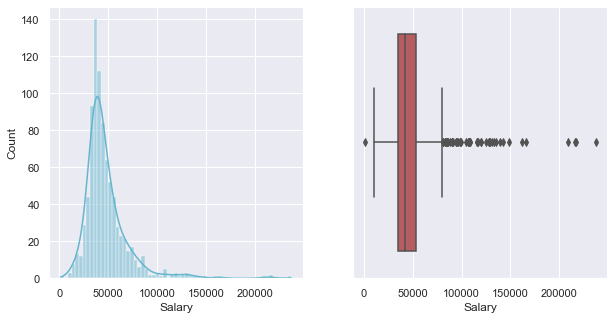

In [116]:
univariateAnalysis_numeric('Salary',50)

Description of age
----------------------------------------------------------------------------
count    872.000000
mean      39.955275
std       10.551675
min       20.000000
25%       32.000000
50%       39.000000
75%       48.000000
max       62.000000
Name: age, dtype: float64

 Skewness of age
----------------------------------------------------------------------------
0.1464120059496387

 Histogram and Boxplot of age
----------------------------------------------------------------------------


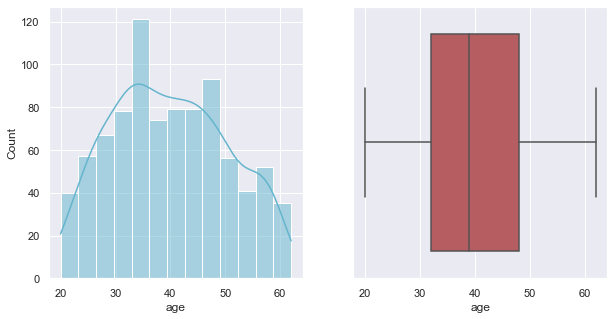

In [117]:
univariateAnalysis_numeric('age',50)

Description of educ
----------------------------------------------------------------------------
count    872.000000
mean       9.307339
std        3.036259
min        1.000000
25%        8.000000
50%        9.000000
75%       12.000000
max       21.000000
Name: educ, dtype: float64

 Skewness of educ
----------------------------------------------------------------------------
-0.045501475549558336

 Histogram and Boxplot of educ
----------------------------------------------------------------------------


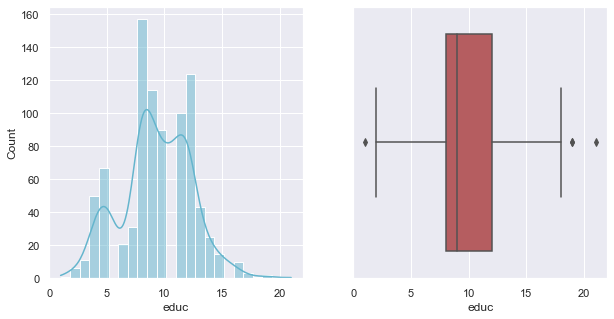

In [118]:
univariateAnalysis_numeric('educ',50)

Description of no_young_children
----------------------------------------------------------------------------
count    872.000000
mean       0.311927
std        0.612870
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: no_young_children, dtype: float64

 Skewness of no_young_children
----------------------------------------------------------------------------
1.946514578433618

 Histogram and Boxplot of no_young_children
----------------------------------------------------------------------------


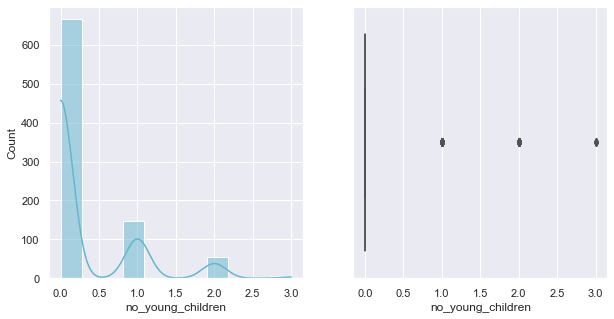

In [119]:
univariateAnalysis_numeric('no_young_children',50)

Description of no_older_children
----------------------------------------------------------------------------
count    872.000000
mean       0.982798
std        1.086786
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        6.000000
Name: no_older_children, dtype: float64

 Skewness of no_older_children
----------------------------------------------------------------------------
0.9539514741197574

 Histogram and Boxplot of no_older_children
----------------------------------------------------------------------------


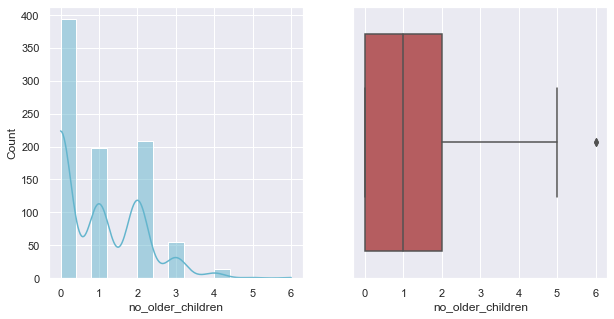

In [120]:
univariateAnalysis_numeric('no_older_children',50)

### Holiday Package

In [121]:
df2.foreign.value_counts(normalize=True)*100

no     75.229358
yes    24.770642
Name: foreign, dtype: float64

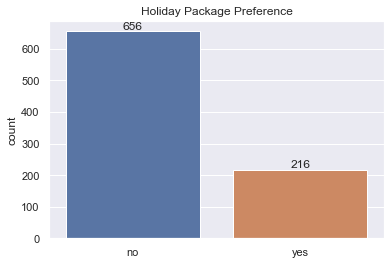

In [122]:
ax= sns.countplot(data=df2,x=df2.foreign.values)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('Holiday Package Preference')
plt.show()


### Foreign

In [123]:
df2.Holliday_Package.value_counts(normalize=True)*100

no     54.013761
yes    45.986239
Name: Holliday_Package, dtype: float64

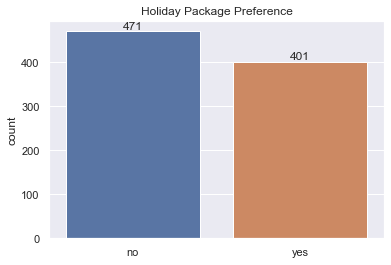

In [124]:
ax= sns.countplot(data=df2,x=df2.Holliday_Package.values)
for i in ax.containers:
    ax.bar_label(i)
    plt.title('Holiday Package Preference')
plt.show()

### Bivariate Analysis of Target Variable

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

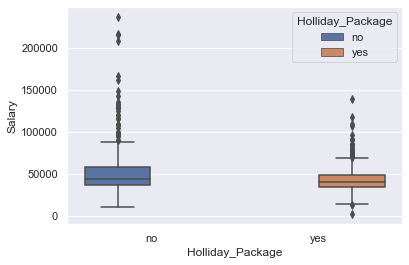

In [125]:
sns.boxplot(y='Salary',x='Holliday_Package',hue='Holliday_Package',data=df2)

### No_of_young_children

<AxesSubplot:xlabel='Holliday_Package', ylabel='no_young_children'>

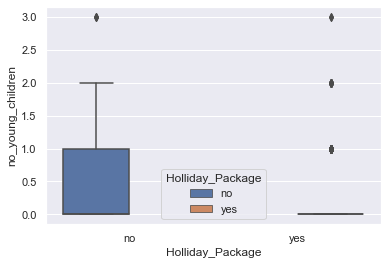

In [126]:
sns.boxplot(y='no_young_children',x='Holliday_Package',hue='Holliday_Package',data=df2)

<Figure size 720x432 with 0 Axes>

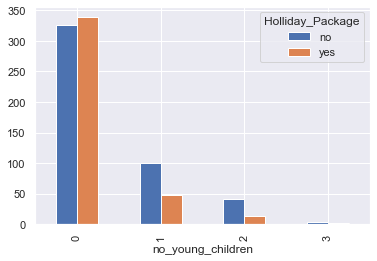

In [127]:
plt.figure(figsize=(10,6))
pd.crosstab(df2['no_young_children'],df2['Holliday_Package']).plot(kind='bar');

### no_older_children

<Figure size 720x432 with 0 Axes>

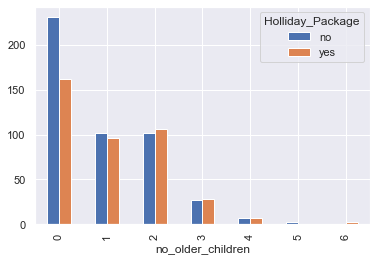

In [128]:
plt.figure(figsize=(10,6))
pd.crosstab(df2['no_older_children'],df2['Holliday_Package']).plot(kind='bar');

### educ

<Figure size 720x432 with 0 Axes>

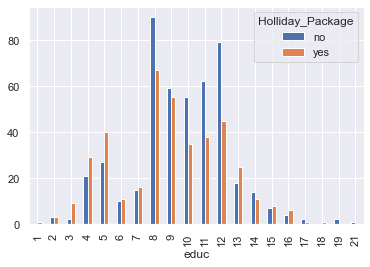

In [129]:
plt.figure(figsize=(10,6))
pd.crosstab(df2['educ'],df2['Holliday_Package']).plot(kind='bar');

### AGE

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

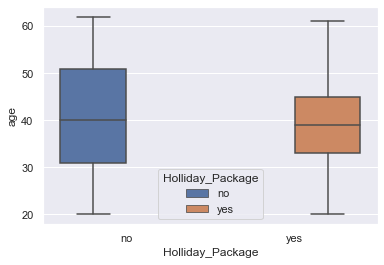

In [130]:
sns.boxplot(y='age',x='Holliday_Package',hue='Holliday_Package',data=df2)

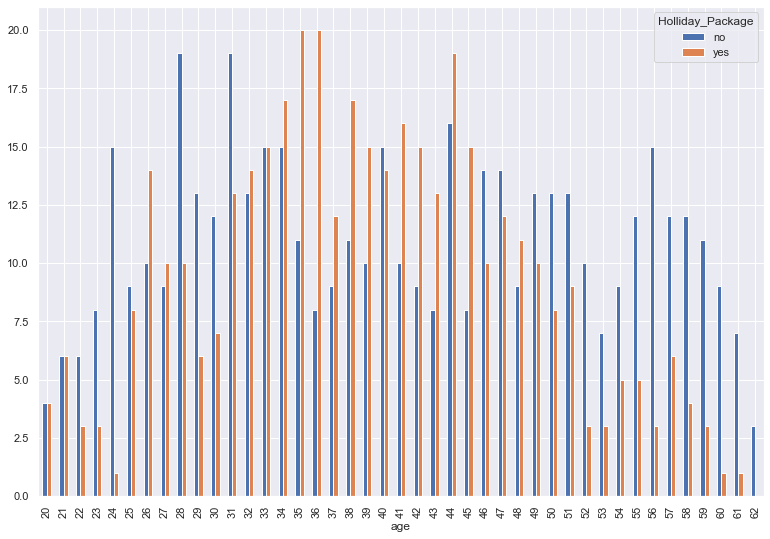

In [131]:
from pylab import rcParams
rcParams['figure.figsize'] = 13,9
pd.crosstab(df2['age'],df2['Holliday_Package']).plot(kind='bar');
plt.show();

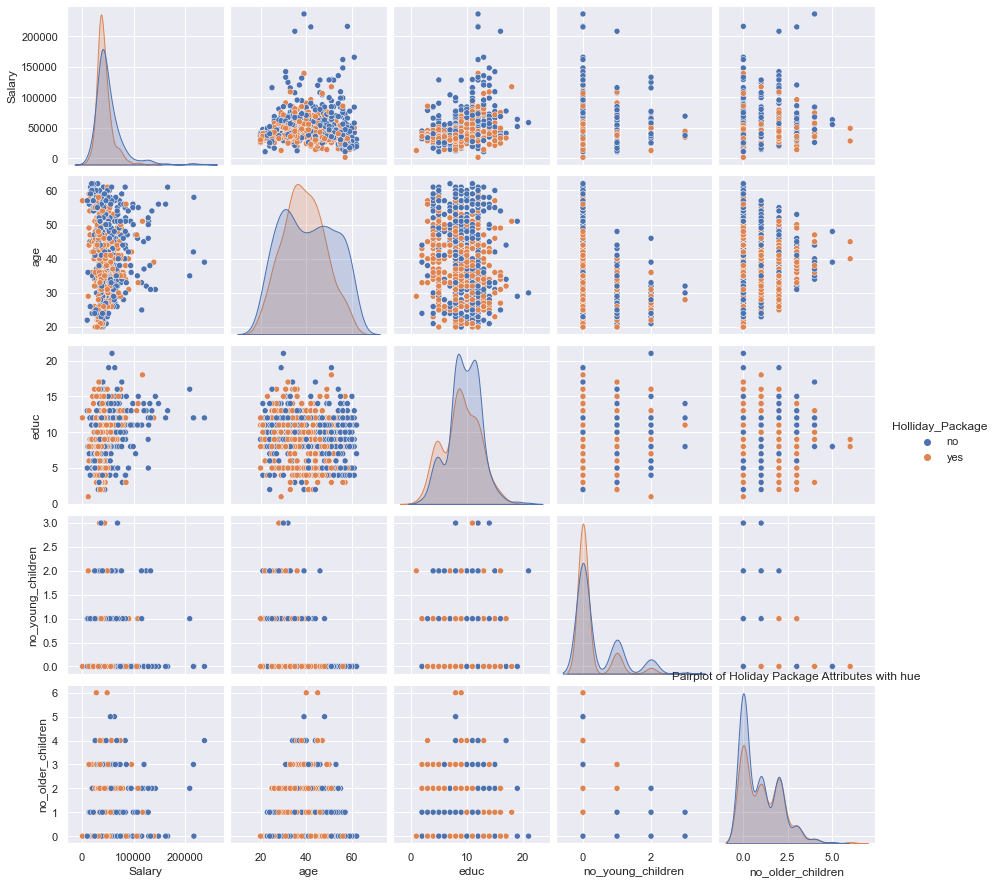

In [132]:
sns.pairplot(data=df2,diag_kind='kde',hue='Holliday_Package')
plt.title('Pairplot of Holiday Package Attributes with hue')
plt.grid()
plt.show()

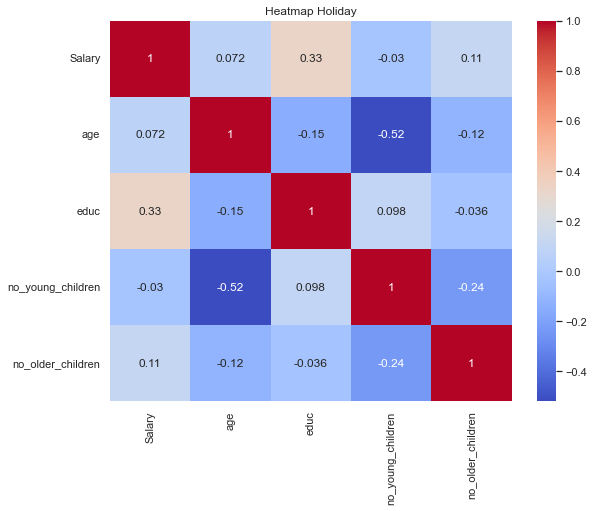

In [133]:
plt.figure(figsize=(9,7))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')
plt.title("Heatmap Holiday")
plt.show()

<AxesSubplot:>

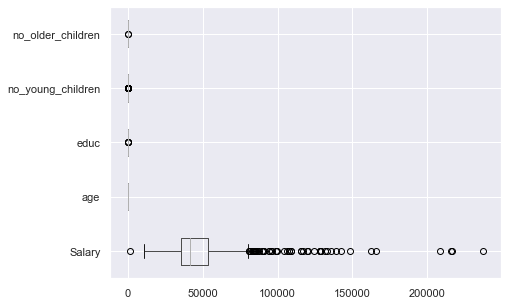

In [134]:
# Let us check presence of outliers
df2.boxplot(vert=0,figsize=(7,5))

In [135]:
num=df2.select_dtypes(['int64'])
num.describe()

Salary         age        educ  no_young_children  \
count     872.000000  872.000000  872.000000         872.000000   
mean    47729.172018   39.955275    9.307339           0.311927   
std     23418.668531   10.551675    3.036259           0.612870   
min      1322.000000   20.000000    1.000000           0.000000   
25%     35324.000000   32.000000    8.000000           0.000000   
50%     41903.500000   39.000000    9.000000           0.000000   
75%     53469.500000   48.000000   12.000000           0.000000   
max    236961.000000   62.000000   21.000000           3.000000   

       no_older_children  
count         872.000000  
mean            0.982798  
std             1.086786  
min             0.000000  
25%             0.000000  
50%             1.000000  
75%             2.000000  
max             6.000000

In [136]:
cat=df2.select_dtypes(['object'])
cat.describe()

Holliday_Package foreign
count               872     872
unique                2       2
top                  no      no
freq                471     656

In [137]:
def detect_outliers(num):
    Q1,Q3=np.percentile(num,[25,75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [138]:
for i in num:
    lr,ur=detect_outliers(df2[i])
    print('\n')
    print(i)
    print('--------------')
    print('Lower Range',lr)
    print('Upper Range',ur)
    print('Proportion of outliers is',np.round(len(df2[df2[i]>ur])*100/len(df2[i]),decimals=2))



Salary
--------------
Lower Range 8105.75
Upper Range 80687.75
Proportion of outliers is 6.42


age
--------------
Lower Range 8.0
Upper Range 72.0
Proportion of outliers is 0.0


educ
--------------
Lower Range 2.0
Upper Range 18.0
Proportion of outliers is 0.34


no_young_children
--------------
Lower Range 0.0
Upper Range 0.0
Proportion of outliers is 23.74


no_older_children
--------------
Lower Range -3.0
Upper Range 5.0
Proportion of outliers is 0.23


In [139]:
df2.columns

Index(['Holliday_Package', 'Salary', 'age', 'educ', 'no_young_children',
       'no_older_children', 'foreign'],
      dtype='object')

In [140]:
for feature in df2[['Salary','age', 'educ', 'no_young_children',
       'no_older_children']]: 
    lr,ur=detect_outliers(df2[feature])
    df2[feature]=np.where(df2[feature]>ur,ur,df2[feature])
    df2[feature]=np.where(df2[feature]<lr,lr,df2[feature])

<AxesSubplot:>

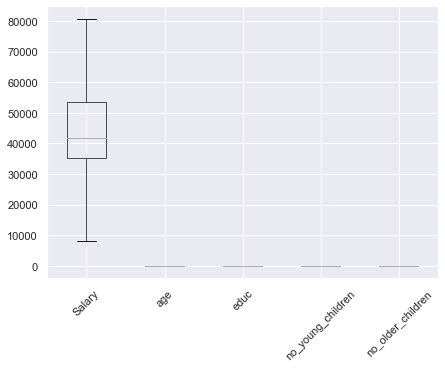

In [141]:
# Let us check presence of outliers
df2.boxplot(rot=45,figsize=(7,5))

## 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Encoding the categorical variables and obtaining the corresponding codes for the same.

In [142]:
for feature in df2.columns: 
    if df2[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df2[feature].unique()))
        print(pd.Categorical(df2[feature].unique()).codes)
        print(pd.Categorical(df2[feature].value_counts()))
        df2[feature] = pd.Categorical(df2[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]
[471, 401]
Categories (2, int64): [401, 471]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]
[656, 216]
Categories (2, int64): [216, 656]


In [143]:
df2.head()

Holliday_Package   Salary   age  educ  no_young_children  \
0                 0  48412.0  30.0   8.0                0.0   
1                 1  37207.0  45.0   8.0                0.0   
2                 0  58022.0  46.0   9.0                0.0   
3                 0  66503.0  31.0  11.0                0.0   
4                 0  66734.0  44.0  12.0                0.0   

   no_older_children  foreign  
0                1.0        0  
1                1.0        0  
2                0.0        0  
3                0.0        0  
4                2.0        0

In [144]:
df2.dtypes

Holliday_Package        int8
Salary               float64
age                  float64
educ                 float64
no_young_children    float64
no_older_children    float64
foreign                 int8
dtype: object

In [145]:
df2[['age', 'educ', 'no_young_children','no_older_children']].astype('int64')

age  educ  no_young_children  no_older_children
0     30     8                  0                  1
1     45     8                  0                  1
2     46     9                  0                  0
3     31    11                  0                  0
4     44    12                  0                  2
..   ...   ...                ...                ...
867   24     4                  0                  1
868   48     8                  0                  0
869   24     6                  0                  0
870   41    10                  0                  1
871   51    10                  0                  0

[872 rows x 4 columns]

### Model Building

In [146]:
# separating the data into dependent and independent variable
X=df2.drop('Holliday_Package',axis=1)
y=df2.pop('Holliday_Package')

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
# splitting the dataset into 70:30 ratio
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1,stratify=y)

In [149]:
print('Number of rows and columns of the training set for the independent variables:',X_train.shape)
print('Number of rows and columns of the training set for the dependent variable:',y_train.shape)
print('Number of rows and columns of the test set for the independent variables:',X_test.shape)
print('Number of rows and columns of the test set for the dependent variable:',y_test.shape)

Number of rows and columns of the training set for the independent variables: (610, 6)
Number of rows and columns of the training set for the dependent variable: (610,)
Number of rows and columns of the test set for the independent variables: (262, 6)
Number of rows and columns of the test set for the dependent variable: (262,)


In [150]:
y_train.value_counts(normalize=True)

0    0.539344
1    0.460656
Name: Holliday_Package, dtype: float64

In [151]:
y_test.value_counts(normalize=True)

0    0.541985
1    0.458015
Name: Holliday_Package, dtype: float64

### Logistic Regression

In [152]:
from sklearn.linear_model import LogisticRegression

In [153]:
# Fit the Logistic Regression model
model = LogisticRegression(solver='newton-cg',max_iter=10000,penalty='none',verbose=True,n_jobs=2)
model.fit(X_train, y_train)

[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg',
                   verbose=True)

### Predicting on Training and Test dataset

In [154]:
ytrain_predict = model.predict(X_train)
ytest_predict = model.predict(X_test)

### Getting the Predicted Classes and Probs

In [155]:
ytest_predict_prob=model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.640709  0.359291
1  0.570289  0.429711
2  0.655202  0.344798
3  0.564445  0.435555
4  0.538775  0.461225

## LDA Model

In [156]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [157]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
lda_model=clf.fit(X_train,y_train)

### Prediction

In [158]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train_lda = lda_model.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test_lda = lda_model.predict(X_test)

### 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

## Logistic Regression

### Model Evaluation

In [159]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix

In [160]:
# Accuracy - Training Data
logreg_train_acc=model.score(X_train, y_train)
logreg_train_acc

0.6344262295081967

### Confusion Matrix for the training data

In [161]:
confusion_matrix(y_train, ytrain_predict)

array([[260,  69],
       [154, 127]], dtype=int64)

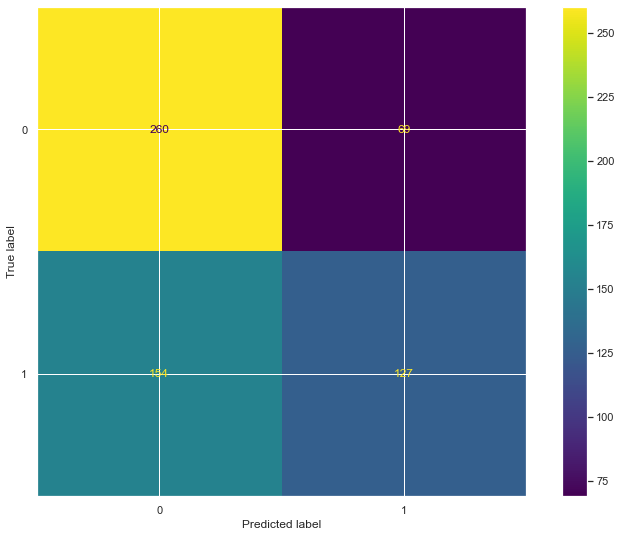

In [162]:
plot_confusion_matrix(model,X_train,y_train);

In [163]:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, ytrain_predict).ravel() 
print('Number of True Positives is ',tp)
print('Number of False Negatives is ',fn)

Number of True Positives is  127
Number of False Negatives is  154


In [164]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610



In [165]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

### AUC ROC TRAIN DATA

AUC: 0.661


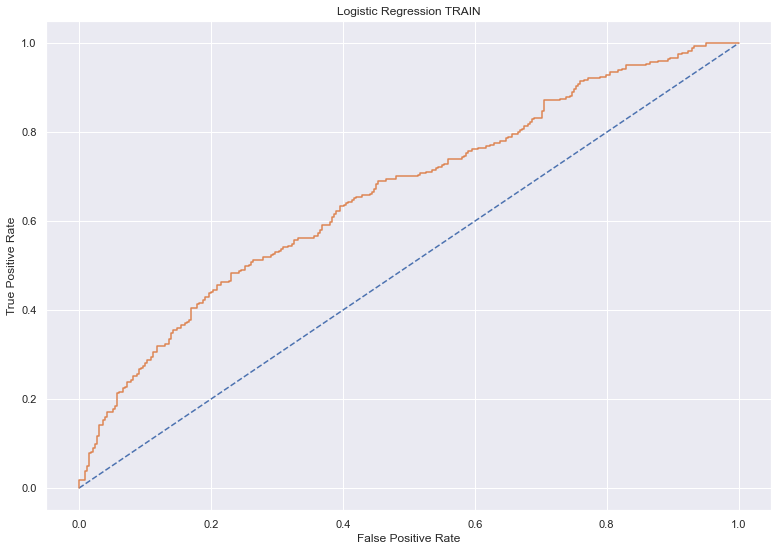

In [166]:
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression TRAIN')
plt.show()

### Confusion Matrix for test data

In [167]:
# Accuracy - Test Data
logreg_test_acc=model.score(X_test, y_test)
logreg_test_acc

0.6603053435114504

In [168]:
confusion_matrix(y_test, ytest_predict)

array([[118,  24],
       [ 65,  55]], dtype=int64)

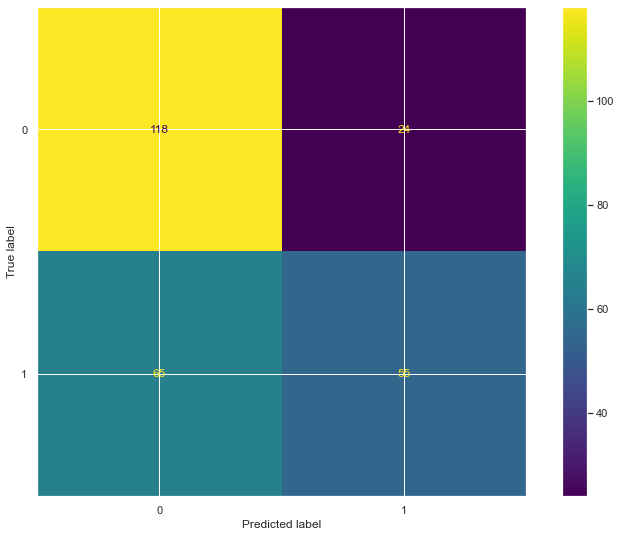

In [169]:
plot_confusion_matrix(model,X_test,y_test);

In [170]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, ytest_predict).ravel() 
print('Number of True Positives is ',tp)
print('Number of False Negatives is ',fn)

Number of True Positives is  55
Number of False Negatives is  65


In [171]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.64      0.83      0.73       142
           1       0.70      0.46      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.64       262
weighted avg       0.67      0.66      0.65       262



In [172]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]

### AUC ROC TEST DATA

AUC: 0.675


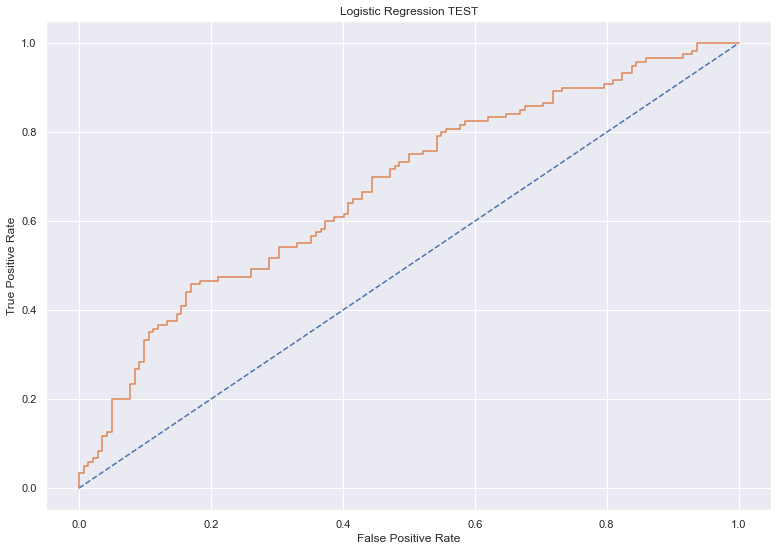

In [173]:
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression TEST')
plt.show()

AUC: 0.661
AUC: 0.675


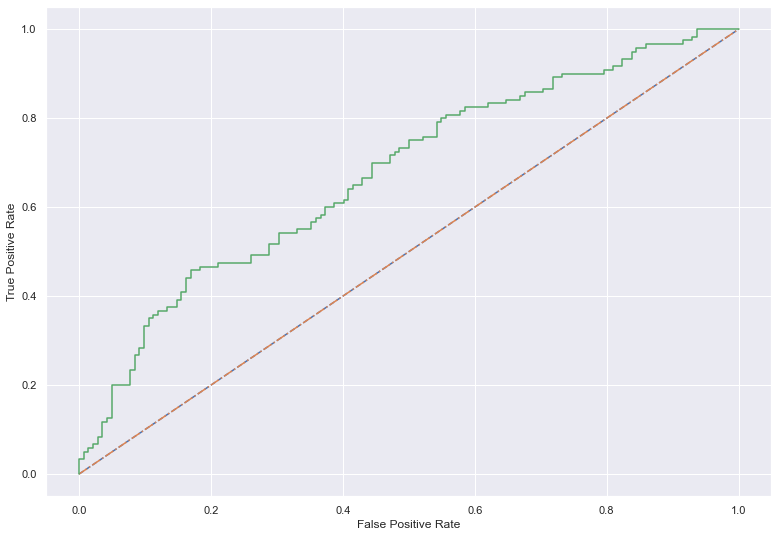

In [174]:
#Logistic Regression Train
# predict probabilities
probs = model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % logreg_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')

#Logistic Regression Test
# predict probabilities
probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
logreg_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % logreg_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='-.')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Applying GridSearchCV for Logistic Regression

In [175]:
grid={'penalty':['l1','l2','none'],
      'solver':['sag','lbfgs','liblinear','saga'],
      'tol':[0.0001,0.00001]}

In [176]:
model = LogisticRegression(max_iter=10000,n_jobs=2)

In [177]:
from sklearn.model_selection import GridSearchCV

In [178]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 10,n_jobs=-1,scoring='recall')

In [179]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='recall')

In [180]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(max_iter=10000, n_jobs=2, solver='liblinear', tol=1e-05)


In [181]:
best_model = grid_search.best_estimator_

In [182]:
best_model.coef_

array([[-1.87522933e-05, -1.30570613e-02,  5.12901729e-02,
         0.00000000e+00,  1.98305392e-01,  1.07198721e+00]])

In [183]:
X_train.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'foreign'],
      dtype='object')

In [184]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytest_predict = best_model.predict(X_test)

In [185]:
## Getting the probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

0         1
0  0.636523  0.363477
1  0.576651  0.423349
2  0.650835  0.349165
3  0.568064  0.431936
4  0.536356  0.463644

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610
 



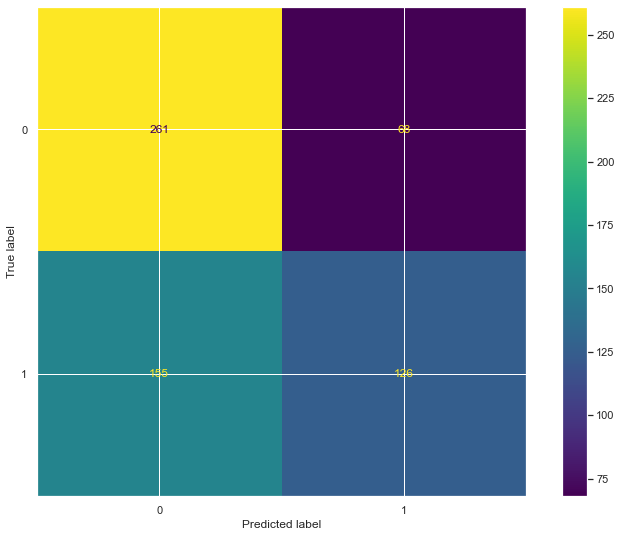

In [186]:
## Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



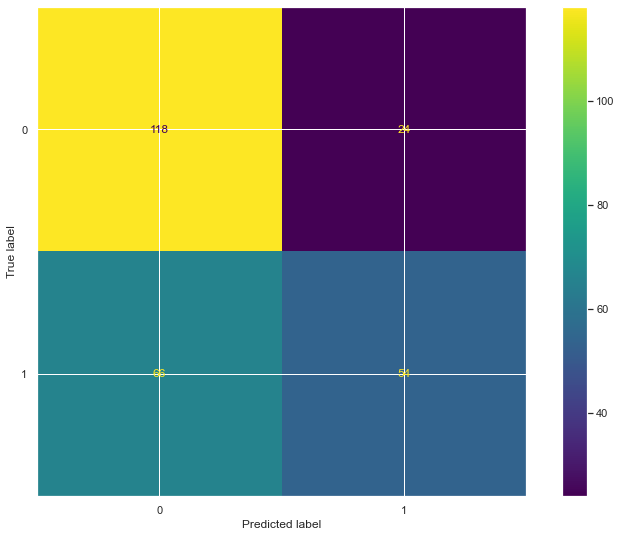

In [187]:
## Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

In [188]:
print('Classification Report of the before Grid search :\n\n',metrics.classification_report(y_train, ytrain_predict),'\n\n\n')
print('Classification Report after Grid search:\n\n',metrics.classification_report(y_test,ytest_predict),'\n')

Classification Report of the before Grid search :

               precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610
 



Classification Report after Grid search:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



In [189]:
logreg_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(logreg_metrics).transpose()
logreg_train_precision=round(df.loc["1"][0],2)
logreg_train_recall=round(df.loc["1"][1],2)
logreg_train_f1=round(df.loc["1"][2],2)
print ('logreg_train_precision ',logreg_train_precision)
print ('logreg_train_recall ',logreg_train_recall)
print ('logreg_train_f1 ',logreg_train_f1)

logreg_train_precision  0.65
logreg_train_recall  0.45
logreg_train_f1  0.53


In [190]:
logreg_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(logreg_metrics).transpose()
logreg_test_precision=round(df.loc["1"][0],2)
logreg_test_recall=round(df.loc["1"][1],2)
logreg_test_f1=round(df.loc["1"][2],2)
print ('logreg_test_precision ',logreg_test_precision)
print ('logreg_test_recall ',logreg_test_recall)
print ('logreg_test_f1 ',logreg_test_f1)

logreg_test_precision  0.69
logreg_test_recall  0.45
logreg_test_f1  0.55


## LDA

### Training Data and Test Data Confusion Matrix Comparison

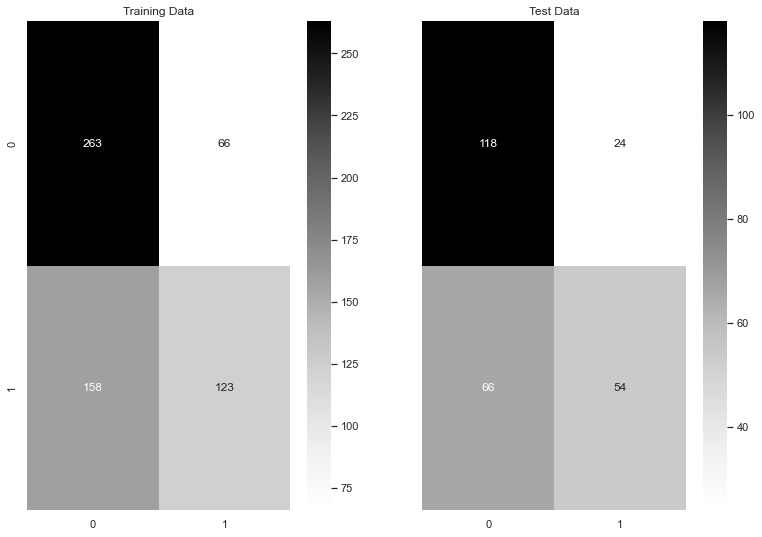

In [191]:
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test_lda)),annot=True,fmt='.5g',cmap='Greys',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [192]:
LDA_default_train_acc=0.63
LDA_default_test_acc=0.66

### Training Data and Test Data Classification Report Comparison

In [193]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train_lda),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test_lda),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



### Probability prediction for the training and test data

In [194]:
# Training Data Probability Prediction
pred_prob_train_lda = lda_model.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test_lda = lda_model.predict_proba(X_test)

In [195]:
pd.DataFrame(pred_prob_train_lda[:,1]).tail()

0
605  0.373284
606  0.454472
607  0.441245
608  0.676082
609  0.458991

### AUC and ROC for the train data and Test data

AUC for the Training Data: 0.661
AUC for the Test Data: 0.675


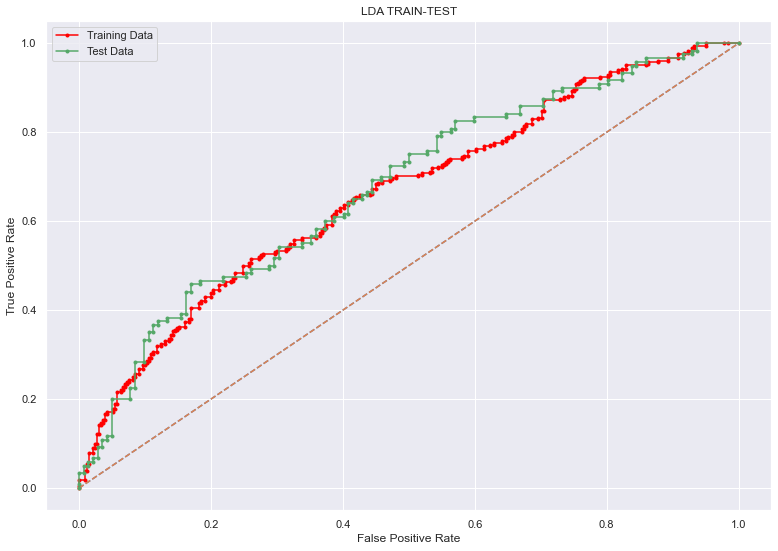

In [196]:
# AUC and ROC for the training data

# calculate AUC
LDA_default_train_auc = metrics.roc_auc_score(y_train,pred_prob_train_lda[:,1])
print('AUC for the Training Data: %.3f' % LDA_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data',color='red')


# AUC and ROC for the test data

# calculate AUC
LDA_default_test_auc = metrics.roc_auc_score(y_test,pred_prob_test_lda[:,1])
print('AUC for the Test Data: %.3f' % LDA_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('LDA TRAIN-TEST')
plt.show()

In [197]:
LDA_default_metrics=classification_report(y_train,pred_class_train_lda,output_dict=True)
df=pd.DataFrame(LDA_default_metrics).transpose()
LDA_default_train_precision=round(df.loc["1"][0],2)
LDA_default_train_recall=round(df.loc["1"][1],2)
LDA_default_train_f1=round(df.loc["1"][2],2)
print ('LDA_default_train_precision ',LDA_default_train_precision)
print ('LDA_default_train_recall ',LDA_default_train_recall)
print ('LDA_default_train_f1 ',LDA_default_train_f1)

LDA_default_train_precision  0.65
LDA_default_train_recall  0.44
LDA_default_train_f1  0.52


In [198]:
LDA_default_metrics=classification_report(y_test,pred_class_test_lda,output_dict=True)
df=pd.DataFrame(LDA_default_metrics).transpose()
LDA_default_test_precision=round(df.loc["1"][0],2)
LDA_default_test_recall=round(df.loc["1"][1],2)
LDA_default_test_f1=round(df.loc["1"][2],2)
print ('LDA_default_test_precision ',LDA_default_test_precision)
print ('LDA_default_test_recall ',LDA_default_test_recall)
print ('LDA_default_test_f1 ',LDA_default_test_f1)

LDA_default_test_precision  0.69
LDA_default_test_recall  0.45
LDA_default_test_f1  0.55


### Changing the cut-off values for maximum accuracy

In [199]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_lda[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('Recall Score',round(metrics.recall_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')


0.1 

Accuracy Score 0.4607
Recall Score 1.0
F1 Score 0.6308 

0.2 

Accuracy Score 0.4738
Recall Score 1.0
F1 Score 0.6365 

0.3 

Accuracy Score 0.5344
Recall Score 0.9324
F1 Score 0.6485 

0.4 

Accuracy Score 0.5787
Recall Score 0.7117
F1 Score 0.6088 

0.5 

Accuracy Score 0.6328
Recall Score 0.4377
F1 Score 0.5234 

0.6 

Accuracy Score 0.6213
Recall Score 0.331
F1 Score 0.446 

0.7 

Accuracy Score 0.5869
Recall Score 0.1459
F1 Score 0.2455 

0.8 

Accuracy Score 0.541
Recall Score 0.0036
F1 Score 0.0071 

0.9 

Accuracy Score 0.5393
Recall Score 0.0
F1 Score 0.0 



In [200]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_lda[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('Precision Score',round(metrics.precision_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')

0.1 

Accuracy Score 0.4607
Precision Score 0.4607
F1 Score 0.6308 

0.2 

Accuracy Score 0.4738
Precision Score 0.4668
F1 Score 0.6365 

0.3 

Accuracy Score 0.5344
Precision Score 0.4972
F1 Score 0.6485 

0.4 

Accuracy Score 0.5787
Precision Score 0.5319
F1 Score 0.6088 

0.5 

Accuracy Score 0.6328
Precision Score 0.6508
F1 Score 0.5234 

0.6 

Accuracy Score 0.6213
Precision Score 0.6838
F1 Score 0.446 

0.7 

Accuracy Score 0.5869
Precision Score 0.7736
F1 Score 0.2455 

0.8 

Accuracy Score 0.541
Precision Score 1.0
F1 Score 0.0071 

0.9 

Accuracy Score 0.5393
Precision Score 0.0
F1 Score 0.0 



0.1 

Accuracy Score 0.4607
Recall Score 1.0
F1 Score 0.6308 

Confusion Matrix


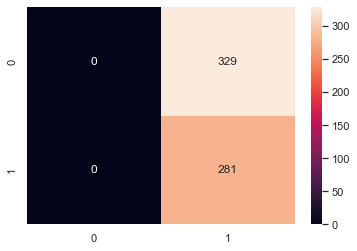

0.2 

Accuracy Score 0.4738
Recall Score 1.0
F1 Score 0.6365 

Confusion Matrix


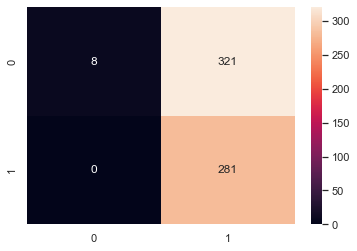

0.3 

Accuracy Score 0.5344
Recall Score 0.9324
F1 Score 0.6485 

Confusion Matrix


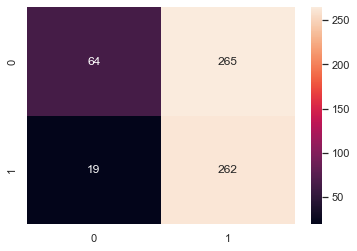

0.4 

Accuracy Score 0.5787
Recall Score 0.7117
F1 Score 0.6088 

Confusion Matrix


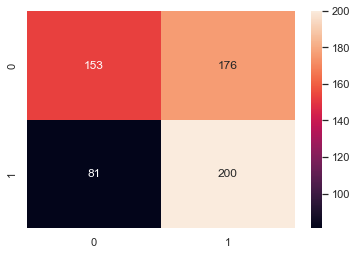

0.5 

Accuracy Score 0.6328
Recall Score 0.4377
F1 Score 0.5234 

Confusion Matrix


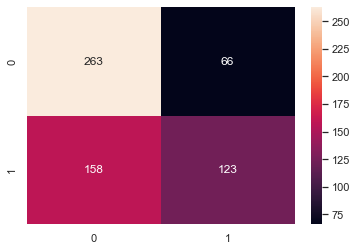

0.6 

Accuracy Score 0.6213
Recall Score 0.331
F1 Score 0.446 

Confusion Matrix


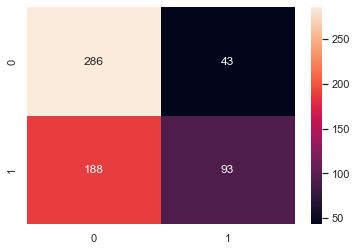

0.7 

Accuracy Score 0.5869
Recall Score 0.1459
F1 Score 0.2455 

Confusion Matrix


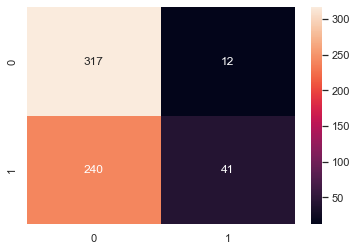

0.8 

Accuracy Score 0.541
Recall Score 0.0036
F1 Score 0.0071 

Confusion Matrix


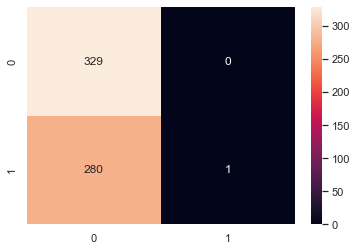

0.9 

Accuracy Score 0.5393
Recall Score 0.0
F1 Score 0.0 

Confusion Matrix


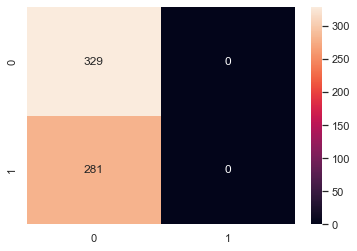

In [201]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train_lda[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('Recall Score',round(metrics.recall_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.show();

In [202]:
#Predicting the classes on the test data

data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test_lda[:,1])):
    if np.array(pred_prob_test_lda[:,1])[i]>0.3:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

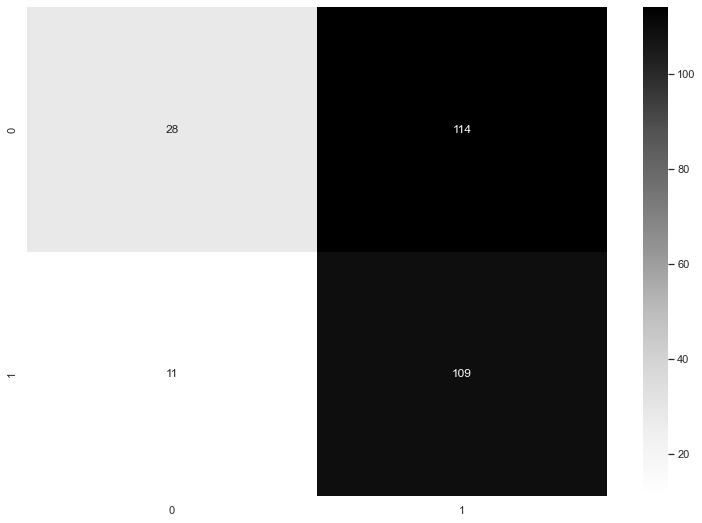

In [203]:
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='Greys');

In [204]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test_lda),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

           0       0.72      0.20      0.31       142
           1       0.49      0.91      0.64       120

    accuracy                           0.52       262
   macro avg       0.60      0.55      0.47       262
weighted avg       0.61      0.52      0.46       262
 



In [205]:
LDA_Custom_acc=0.52

AUC for the Training Data: 0.661
AUC for the Test Data with default cutoff: 0.675
AUC for the Test Data with custom cutoff: 0.553


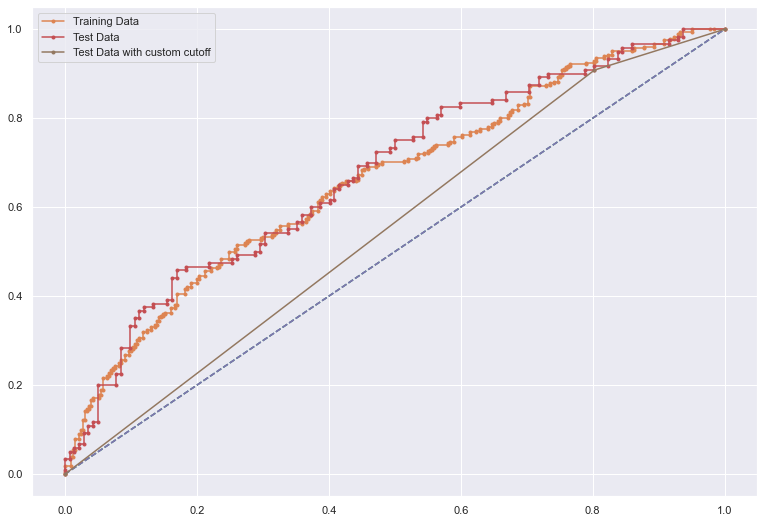

In [206]:
# AUC and ROC for the training data

# calculate AUC
LDA_default_train_auc= metrics.roc_auc_score(y_train,pred_prob_train_lda[:,1])
print('AUC for the Training Data: %.3f' % LDA_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data with default cutoff

# calculate AUC
LDA_default_test_auc= metrics.roc_auc_score(y_test,pred_prob_test_lda[:,1])
print('AUC for the Test Data with default cutoff: %.3f' % LDA_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label='Test Data')


# AUC and ROC for the test data with custom cutoff

# calculate AUC
LDA_Custom_auc= metrics.roc_auc_score(y_test,data_pred_custom_cutoff)
print('AUC for the Test Data with custom cutoff: %.3f' % LDA_Custom_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,data_pred_custom_cutoff)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label='Test Data with custom cutoff')
# show the plot
plt.legend(loc='best')
plt.show()

In [207]:
LDA_Custom_cutoff_metrics=classification_report(y_test,data_pred_custom_cutoff,output_dict=True)
df=pd.DataFrame(LDA_Custom_cutoff_metrics).transpose()
LDA_Custom_precision=round(df.loc["1"][0],2)
LDA_Custom_recall=round(df.loc["1"][1],2)
LDA_Custom_f1=round(df.loc["1"][2],2)
print ('LDA_Custom_precision ',LDA_Custom_precision)
print ('LDA_Custom_recall ',LDA_Custom_recall)
print ('LDA_Custom_f1 ',LDA_Custom_f1)

LDA_Custom_precision  0.49
LDA_Custom_recall  0.91
LDA_Custom_f1  0.64


### Comparison of the performance metrics from the models

In [208]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'logreg Train':[logreg_train_acc,logreg_train_auc,logreg_train_recall,logreg_train_precision,logreg_train_f1],
        'logreg Test':[logreg_test_acc,logreg_test_auc,logreg_test_recall,logreg_test_precision,logreg_test_f1],
       'LDA_default Train':[LDA_default_train_acc,LDA_default_train_auc,LDA_default_train_recall,LDA_default_train_precision,LDA_default_train_f1],
        'LDA_default Test':[LDA_default_test_acc,LDA_default_test_auc,LDA_default_test_recall,LDA_default_test_precision,LDA_default_test_f1],
        'LDA_Custom':[LDA_Custom_acc,LDA_Custom_auc,LDA_Custom_recall,LDA_Custom_precision,LDA_Custom_f1]},index=index)
round(data,2)

logreg Train  logreg Test  LDA_default Train  LDA_default Test  \
Accuracy           0.63         0.66               0.63              0.66   
AUC                0.66         0.67               0.66              0.68   
Recall             0.45         0.45               0.44              0.45   
Precision          0.65         0.69               0.65              0.69   
F1 Score           0.53         0.55               0.52              0.55   

           LDA_Custom  
Accuracy         0.52  
AUC              0.55  
Recall           0.91  
Precision        0.49  
F1 Score         0.64

AUC for the LDA default Training Data: 0.661
AUC for the Test Data with default cutoff: 0.675
AUC for the Test Data with custom cutoff: 0.553


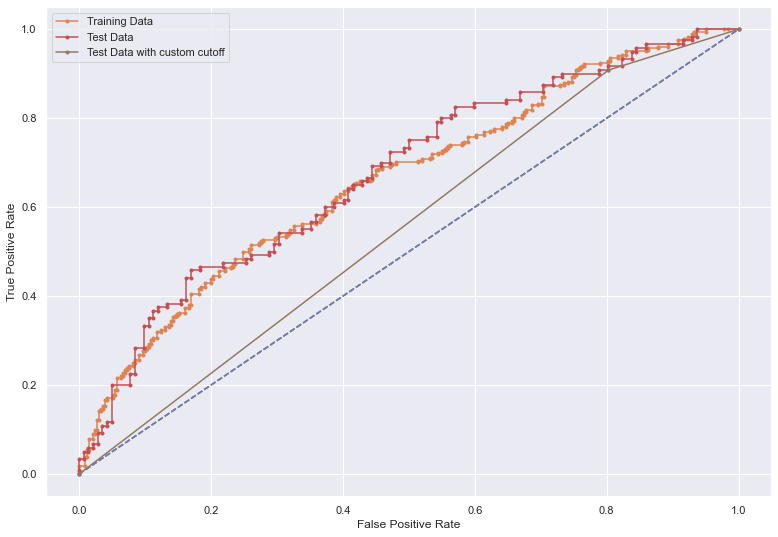

In [209]:


# AUC and ROC for the training data

# calculate AUC
LDA_default_train_auc= metrics.roc_auc_score(y_train,pred_prob_train_lda[:,1])
print('AUC for the LDA default Training Data: %.3f' % LDA_default_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data with default cutoff

# calculate AUC
LDA_default_test_auc= metrics.roc_auc_score(y_test,pred_prob_test_lda[:,1])
print('AUC for the Test Data with default cutoff: %.3f' % LDA_default_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test_lda[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label='Test Data')


# AUC and ROC for the test data with custom cutoff

# calculate AUC
LDA_Custom_auc= metrics.roc_auc_score(y_test,data_pred_custom_cutoff)
print('AUC for the Test Data with custom cutoff: %.3f' % LDA_Custom_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,data_pred_custom_cutoff)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the lda_model
plt.plot(fpr, tpr, marker='.',label='Test Data with custom cutoff')
# show the plot
plt.legend(loc='best')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 2.4 Inference: Basis on these predictions, what are the insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

The various steps involved in the project are as follows:
1.	Loading and reading the data set, checking the data types and descriptive summary.
2.	Performing EDA through Univariate, bivariate and multivariate analysis, Outlier treatment and imputing the missing values studying about the various patterns and correlations (through Heatmap) present in the data with the useful insights from the EDA process and interpreting the same.
3.	Encoding the Categorical variable with categorical codes.
4.	Separating the independent and Dependent variable, splitting them in 70:30 ratio.
5.	Building the Logistic Regression Model and Linear Discriminant Model obtaining the model accuracy, confusion matrix, classification report and AUC-ROC curve for both training and testing data, getting the coefficients and the intercepts for Logistic Regression model.
6.	After evaluating the model metrics for both the models we built an improvised LDA model with custom cut off for obtaining high recall and better F1 score.
7.	Finally we compared all the model through the lens of model metrics and came to the conclusion that for this case study LDA with custom cut off is a better choice


Business Insights
1) There is no reasonable effect of salary, age, and education on the prediction for Holiday_Package. These variables do not seem to affect the decision to opt for holiday packages, as we could not establish a strong relation of these variables with the target variable 
2) ‘Foreign’ has emerged as a strong predictor with a positive coefficient value. The log likelihood or likelihood of a foreigner opting for a holiday package is high.   
3) No_young_children variable is negating the probability for opting for holiday packages, especially for couple with number of young children at two.   
Recommendation:  
1) The company should really focus on foreigners to drive the sales of their holiday packages, as that is where the majority of conversions are going to come in.  
2) The company can try to direct their marketing efforts or offers toward foreigners for a increasing the rate of opting for holiday packages  
3) The company should also stay away from targeting parents with younger children. The chances of selling to parents with two younger children is probably the lowest. This also gels with the fact that parents try to avoid visiting with younger children as they need more care.
4) The company can offer membership, holiday plans to those with formal educ of 1 to 7 range and 13 to 18 range at affordable rates
5) We saw through EDA that employees in middle range (34 to 45 years) are going for holiday package as compared to older and younger employees, so this age group can be targeted with 
Strategies like offer 1 ticket free for a child if they have two Childs.
5) If the firm wants to target parents with older children, that still might end up giving favourable return for their marketing efforts then spent on couples with younger children.   
